In [19]:
import pandas as pd
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import joblib
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
torch.cuda.is_available()

True

In [3]:
from utils import plot_confusion_matrix
from dataset import read_dataset, prepare_dataset
from models import RNNModel, ComplexRNNModel
from constants import BASIC_TRAINING_COLS, FORCE_CLASS_COLS, MASS_CLASS_COLS
from training import evaluate, training_loop

# MASS TRAINING (max so far 52%)

## Read dataset and preprocess it

In [4]:
all_trials = read_dataset("passive_trials.h5")
train_loader, val_loader, scaler = prepare_dataset(all_trials, MASS_CLASS_COLS, 
                                                   normalise_data=True, batch_size=128, test_size=0.3)

In [5]:
Y = []
for x,y in train_loader:
    
    Y.extend(list(y))

counts = np.unique(Y, return_counts=True)[1]

In [6]:
print("Majority class: ", np.max(counts) / np.sum(counts))

Majority class:  0.35446428571428573


## Define model, loss and optimizer

In [7]:
np.random.seed(0)
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

input_dim = len(BASIC_TRAINING_COLS)    # input dimension
first_hidden_dim = 12  # hidden layer dimension
second_hidden_dim = 6     # number of hidden layers
output_dim = 3   # output dimension

model = ComplexRNNModel(input_dim, first_hidden_dim, second_hidden_dim, output_dim)
model = model.cuda()

error = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Train model and plot loss and accuracy

In [8]:
epoch_losses, epoch_accuracies = training_loop(model, optimizer, error, train_loader, val_loader, num_epochs=200)

  0%|          | 1/200 [00:01<04:39,  1.40s/it]

1.1002036597993639 33.75


  1%|          | 2/200 [00:02<04:22,  1.32s/it]

1.0988434553146362 36.666666666666664


  2%|▏         | 3/200 [00:03<04:03,  1.24s/it]

1.0965168741014268 38.333333333333336


  2%|▏         | 4/200 [00:04<03:55,  1.20s/it]

1.0959656635920207 37.083333333333336


  2%|▎         | 5/200 [00:05<03:46,  1.16s/it]

1.0951078865263197 38.333333333333336


  3%|▎         | 6/200 [00:06<03:40,  1.14s/it]

1.0938268502553303 38.333333333333336


  4%|▎         | 7/200 [00:07<03:36,  1.12s/it]

1.0930520296096802 38.541666666666664


  4%|▍         | 8/200 [00:08<03:28,  1.09s/it]

1.091063870324029 38.75


  4%|▍         | 9/200 [00:10<03:30,  1.10s/it]

1.0897263288497925 38.333333333333336


  5%|▌         | 10/200 [00:11<03:25,  1.08s/it]

1.0864516231748793 37.708333333333336


  6%|▌         | 11/200 [00:12<03:24,  1.08s/it]

1.0843103991614447 37.916666666666664


  6%|▌         | 12/200 [00:13<03:25,  1.09s/it]

1.081234335899353 37.5


  6%|▋         | 13/200 [00:14<03:23,  1.09s/it]

1.07895118660397 38.958333333333336


  7%|▋         | 14/200 [00:15<03:19,  1.07s/it]

1.0727910995483398 40.208333333333336


  8%|▊         | 15/200 [00:16<03:20,  1.09s/it]

1.0675636265012953 39.791666666666664


  8%|▊         | 16/200 [00:17<03:17,  1.07s/it]

1.0617763068940904 38.541666666666664


  8%|▊         | 17/200 [00:18<03:12,  1.05s/it]

1.0554243591096666 38.958333333333336


  9%|▉         | 18/200 [00:19<03:12,  1.06s/it]

1.0470489925808377 39.375


 10%|▉         | 19/200 [00:20<03:10,  1.05s/it]

1.0401462978786893 39.375


 10%|█         | 20/200 [00:21<03:08,  1.05s/it]

1.0320688486099243 39.375


 10%|█         | 21/200 [00:22<03:06,  1.04s/it]

1.021998319360945 39.375


 11%|█         | 22/200 [00:23<03:06,  1.05s/it]

1.0124490194850497 39.375


 12%|█▏        | 23/200 [00:24<03:07,  1.06s/it]

1.0039122568236456 39.375


 12%|█▏        | 24/200 [00:25<03:05,  1.05s/it]

0.9955535795953538 40.416666666666664


 12%|█▎        | 25/200 [00:26<03:03,  1.05s/it]

0.9875312050183614 40.416666666666664


 13%|█▎        | 26/200 [00:28<03:03,  1.05s/it]

0.9783543282084994 42.083333333333336


 14%|█▎        | 27/200 [00:29<03:04,  1.07s/it]

0.9730180104573568 42.083333333333336


 14%|█▍        | 28/200 [00:30<03:03,  1.07s/it]

0.9703211718135409 42.291666666666664


 14%|█▍        | 29/200 [00:31<03:10,  1.12s/it]

0.9559677044550577 41.875


 15%|█▌        | 30/200 [00:32<03:21,  1.19s/it]

0.948238922490014 41.25


 16%|█▌        | 31/200 [00:33<03:15,  1.15s/it]

0.9518537123998007 40.625


 16%|█▌        | 32/200 [00:34<03:09,  1.13s/it]

0.948537117905087 41.041666666666664


 16%|█▋        | 33/200 [00:36<03:04,  1.10s/it]

0.9358164535628425 40.833333333333336


 17%|█▋        | 34/200 [00:37<03:01,  1.10s/it]

0.9245900445514255 39.791666666666664


 18%|█▊        | 35/200 [00:38<02:59,  1.09s/it]

0.9193310936292013 41.458333333333336


 18%|█▊        | 36/200 [00:39<02:57,  1.08s/it]

0.9161999622980753 41.25


 18%|█▊        | 37/200 [00:40<02:58,  1.09s/it]

0.9053073790338304 40.625


 19%|█▉        | 38/200 [00:41<03:06,  1.15s/it]

0.9024192425939772 41.666666666666664


 20%|█▉        | 39/200 [00:42<03:05,  1.15s/it]

0.9007504317495558 41.25


 20%|██        | 40/200 [00:43<02:59,  1.12s/it]

0.8972737458017137 41.25


 20%|██        | 41/200 [00:44<02:55,  1.10s/it]

0.8902479343944125 42.083333333333336


 21%|██        | 42/200 [00:45<02:54,  1.11s/it]

0.8844193882412381 42.291666666666664


 22%|██▏       | 43/200 [00:47<02:59,  1.14s/it]

0.8823398351669312 41.875


 22%|██▏       | 44/200 [00:48<02:55,  1.12s/it]

0.8764341804716322 42.916666666666664


 22%|██▎       | 45/200 [00:49<02:52,  1.11s/it]

0.8832987546920776 40.625


 23%|██▎       | 46/200 [00:50<02:48,  1.10s/it]

0.8800312810473971 42.083333333333336


 24%|██▎       | 47/200 [00:51<02:45,  1.08s/it]

0.8843465050061544 42.5


 24%|██▍       | 48/200 [00:52<02:44,  1.09s/it]

0.8822444015079074 41.666666666666664


 24%|██▍       | 49/200 [00:53<02:43,  1.08s/it]

0.8588938183254666 42.083333333333336


 25%|██▌       | 50/200 [00:54<02:41,  1.08s/it]

0.8540412187576294 41.666666666666664


 26%|██▌       | 51/200 [00:55<02:40,  1.08s/it]

0.8571458922492133 41.875


 26%|██▌       | 52/200 [00:56<02:40,  1.09s/it]

0.8543581697675917 41.875


 26%|██▋       | 53/200 [00:58<02:41,  1.10s/it]

0.8431235750516256 42.5


 27%|██▋       | 54/200 [00:59<02:40,  1.10s/it]

0.8399791320164999 42.5


 28%|██▊       | 55/200 [01:00<02:38,  1.09s/it]

0.8347277508841621 42.083333333333336


 28%|██▊       | 56/200 [01:01<02:36,  1.09s/it]

0.829696794350942 42.291666666666664


 28%|██▊       | 57/200 [01:02<02:35,  1.09s/it]

0.8300926354196336 42.083333333333336


 29%|██▉       | 58/200 [01:03<02:34,  1.09s/it]

0.8301873869366116 41.458333333333336


 30%|██▉       | 59/200 [01:04<02:33,  1.09s/it]

0.8218362861209445 41.666666666666664


 30%|███       | 60/200 [01:05<02:32,  1.09s/it]

0.813176863723331 41.875


 30%|███       | 61/200 [01:06<02:30,  1.09s/it]

0.8186222910881042 40.833333333333336


 31%|███       | 62/200 [01:07<02:29,  1.09s/it]

0.8024747769037882 41.041666666666664


 32%|███▏      | 63/200 [01:08<02:28,  1.08s/it]

0.7996162242359586 41.666666666666664


 32%|███▏      | 64/200 [01:09<02:26,  1.08s/it]

0.798663404252794 40.625


 32%|███▎      | 65/200 [01:11<02:25,  1.08s/it]

0.8039121826489767 40.833333333333336


 33%|███▎      | 66/200 [01:12<02:23,  1.07s/it]

0.813137776321835 40.416666666666664


 34%|███▎      | 67/200 [01:13<02:22,  1.07s/it]

0.7963720560073853 40.0


 34%|███▍      | 68/200 [01:14<02:22,  1.08s/it]

0.8014188408851624 39.791666666666664


 34%|███▍      | 69/200 [01:15<02:21,  1.08s/it]

0.8010515636867948 40.208333333333336


 35%|███▌      | 70/200 [01:16<02:21,  1.09s/it]

0.781738387213813 40.0


 36%|███▌      | 71/200 [01:17<02:19,  1.08s/it]

0.7832637164327834 41.875


 36%|███▌      | 72/200 [01:18<02:18,  1.08s/it]

0.7849752969212003 40.625


 36%|███▋      | 73/200 [01:19<02:16,  1.08s/it]

0.76677938302358 40.833333333333336


 37%|███▋      | 74/200 [01:20<02:15,  1.08s/it]

0.7703283826510111 39.791666666666664


 38%|███▊      | 75/200 [01:21<02:13,  1.07s/it]

0.7859080301390754 41.041666666666664


 38%|███▊      | 76/200 [01:22<02:12,  1.07s/it]

0.7730569574568007 41.666666666666664


 38%|███▊      | 77/200 [01:23<02:11,  1.07s/it]

0.7623366249932183 41.041666666666664


 39%|███▉      | 78/200 [01:25<02:11,  1.08s/it]

0.7677896949979994 41.458333333333336


 40%|███▉      | 79/200 [01:26<02:10,  1.08s/it]

0.7405984865294563 41.041666666666664


 40%|████      | 80/200 [01:27<02:10,  1.08s/it]

0.7430766489770677 40.0


 40%|████      | 81/200 [01:28<02:08,  1.08s/it]

0.7649244003825717 40.208333333333336


 41%|████      | 82/200 [01:29<02:07,  1.08s/it]

0.7446414563390944 40.208333333333336


 42%|████▏     | 83/200 [01:30<02:06,  1.08s/it]

0.754496607515547 40.625


 42%|████▏     | 84/200 [01:31<02:04,  1.07s/it]

0.7446041636996799 40.416666666666664


 42%|████▎     | 85/200 [01:32<02:03,  1.08s/it]

0.7319063941637675 40.833333333333336


 43%|████▎     | 86/200 [01:33<02:02,  1.07s/it]

0.7362189491589864 40.625


 44%|████▎     | 87/200 [01:34<02:01,  1.07s/it]

0.7329895363913642 40.625


 44%|████▍     | 88/200 [01:35<02:00,  1.08s/it]

0.7262561586168077 41.25


 44%|████▍     | 89/200 [01:36<01:59,  1.08s/it]

0.7305955555703905 40.833333333333336


 45%|████▌     | 90/200 [01:38<01:59,  1.09s/it]

0.7131300436125861 41.458333333333336


 46%|████▌     | 91/200 [01:39<01:57,  1.08s/it]

0.7209373315175375 41.25


 46%|████▌     | 92/200 [01:40<01:56,  1.08s/it]

0.7175730599297417 40.625


 46%|████▋     | 93/200 [01:41<01:54,  1.07s/it]

0.7101716730329726 40.625


 47%|████▋     | 94/200 [01:42<01:53,  1.07s/it]

0.7053256564670138 40.625


 48%|████▊     | 95/200 [01:43<01:53,  1.08s/it]

0.7080160975456238 41.041666666666664


 48%|████▊     | 96/200 [01:44<01:52,  1.08s/it]

0.6953211095598009 41.25


 48%|████▊     | 97/200 [01:45<01:50,  1.08s/it]

0.7030440635151334 39.583333333333336


 49%|████▉     | 98/200 [01:46<01:50,  1.08s/it]

0.6895512872272067 39.583333333333336


 50%|████▉     | 99/200 [01:47<01:49,  1.09s/it]

0.6946191589037577 40.416666666666664


 50%|█████     | 100/200 [01:48<01:47,  1.07s/it]

0.7023932337760925 40.625


 50%|█████     | 101/200 [01:49<01:46,  1.08s/it]

0.6981295148531595 40.625


 51%|█████     | 102/200 [01:50<01:45,  1.08s/it]

0.6918650998009576 40.0


 52%|█████▏    | 103/200 [01:52<01:44,  1.08s/it]

0.6812961763805814 41.875


 52%|█████▏    | 104/200 [01:53<01:41,  1.06s/it]

0.6836047636138068 41.041666666666664


 52%|█████▎    | 105/200 [01:54<01:41,  1.06s/it]

0.702269454797109 41.25


 53%|█████▎    | 106/200 [01:55<01:39,  1.06s/it]

0.67998825179206 42.083333333333336


 54%|█████▎    | 107/200 [01:56<01:39,  1.07s/it]

0.6849147213829888 41.25


 54%|█████▍    | 108/200 [01:57<01:38,  1.07s/it]

0.6688364413049486 40.833333333333336


 55%|█████▍    | 109/200 [01:58<01:37,  1.07s/it]

0.6798552672068278 42.291666666666664


 55%|█████▌    | 110/200 [01:59<01:35,  1.06s/it]

0.6944752799140083 42.708333333333336


 56%|█████▌    | 111/200 [02:00<01:33,  1.05s/it]

0.6797251635127597 42.708333333333336


 56%|█████▌    | 112/200 [02:01<01:32,  1.05s/it]

0.6779938075277541 42.291666666666664


 56%|█████▋    | 113/200 [02:02<01:32,  1.06s/it]

0.6675990753703647 42.291666666666664


 57%|█████▋    | 114/200 [02:03<01:31,  1.06s/it]

0.6637690199746026 42.083333333333336


 57%|█████▊    | 115/200 [02:04<01:30,  1.07s/it]

0.668675594859653 43.125


 58%|█████▊    | 116/200 [02:05<01:29,  1.07s/it]

0.6636345386505127 42.083333333333336


 58%|█████▊    | 117/200 [02:06<01:28,  1.06s/it]

0.6655136744181315 41.458333333333336


 59%|█████▉    | 118/200 [02:07<01:26,  1.06s/it]

0.6606331136491563 41.458333333333336


 60%|█████▉    | 119/200 [02:08<01:26,  1.07s/it]

0.6569120089213053 41.041666666666664


 60%|██████    | 120/200 [02:10<01:25,  1.07s/it]

0.648958232667711 41.666666666666664


 60%|██████    | 121/200 [02:11<01:24,  1.08s/it]

0.6540805167622037 39.375


 61%|██████    | 122/200 [02:12<01:24,  1.09s/it]

0.645263844066196 40.416666666666664


 62%|██████▏   | 123/200 [02:13<01:23,  1.09s/it]

0.6460367441177368 42.291666666666664


 62%|██████▏   | 124/200 [02:14<01:22,  1.09s/it]

0.6542021102375455 41.875


 62%|██████▎   | 125/200 [02:15<01:21,  1.08s/it]

0.6408690578407712 41.875


 63%|██████▎   | 126/200 [02:16<01:20,  1.09s/it]

0.6386012699868944 42.5


 64%|██████▎   | 127/200 [02:17<01:18,  1.08s/it]

0.6347010069423251 41.875


 64%|██████▍   | 128/200 [02:18<01:17,  1.08s/it]

0.6323172748088837 41.875


 64%|██████▍   | 129/200 [02:19<01:16,  1.08s/it]

0.6395084261894226 41.666666666666664


 65%|██████▌   | 130/200 [02:20<01:15,  1.09s/it]

0.6281690498193105 42.916666666666664


 66%|██████▌   | 131/200 [02:21<01:14,  1.08s/it]

0.6378476222356161 42.708333333333336


 66%|██████▌   | 132/200 [02:23<01:14,  1.10s/it]

0.641780263847775 43.125


 66%|██████▋   | 133/200 [02:24<01:13,  1.10s/it]

0.6256058745914035 43.541666666666664


 67%|██████▋   | 134/200 [02:25<01:12,  1.10s/it]

0.6301161845525106 44.166666666666664


 68%|██████▊   | 135/200 [02:26<01:12,  1.11s/it]

0.617360383272171 43.333333333333336


 68%|██████▊   | 136/200 [02:27<01:09,  1.09s/it]

0.627407064040502 42.708333333333336


 68%|██████▊   | 137/200 [02:28<01:08,  1.08s/it]

0.6270727117856344 43.333333333333336


 69%|██████▉   | 138/200 [02:29<01:07,  1.09s/it]

0.619012690252728 42.5


 70%|██████▉   | 139/200 [02:30<01:05,  1.08s/it]

0.6106156872378455 42.291666666666664


 70%|███████   | 140/200 [02:31<01:04,  1.08s/it]

0.6204893787701925 42.708333333333336


 70%|███████   | 141/200 [02:32<01:03,  1.08s/it]

0.6216604775852628 42.916666666666664


 71%|███████   | 142/200 [02:33<01:02,  1.08s/it]

0.6078572372595469 42.5


 72%|███████▏  | 143/200 [02:35<01:01,  1.07s/it]

0.6065819197230868 42.708333333333336


 72%|███████▏  | 144/200 [02:36<00:59,  1.07s/it]

0.6407029827435812 43.125


 72%|███████▎  | 145/200 [02:37<00:58,  1.07s/it]

0.6541357967588637 42.5


 73%|███████▎  | 146/200 [02:38<00:58,  1.08s/it]

0.6892385482788086 42.291666666666664


 74%|███████▎  | 147/200 [02:39<00:57,  1.09s/it]

0.6891347434785631 42.083333333333336


 74%|███████▍  | 148/200 [02:40<00:56,  1.09s/it]

0.6783185866143968 42.291666666666664


 74%|███████▍  | 149/200 [02:41<00:55,  1.09s/it]

0.6577150689231025 42.291666666666664


 75%|███████▌  | 150/200 [02:42<00:54,  1.08s/it]

0.6425776878992716 43.125


 76%|███████▌  | 151/200 [02:43<00:52,  1.08s/it]

0.6519912944899665 42.083333333333336


 76%|███████▌  | 152/200 [02:44<00:52,  1.10s/it]

0.6359345184432136 42.5


 76%|███████▋  | 153/200 [02:45<00:51,  1.10s/it]

0.6280300286081102 43.333333333333336


 77%|███████▋  | 154/200 [02:47<00:50,  1.09s/it]

0.6417988803651598 43.75


 78%|███████▊  | 155/200 [02:48<00:48,  1.08s/it]

0.6316430303785536 45.0


 78%|███████▊  | 156/200 [02:49<00:47,  1.09s/it]

0.6225681967205472 44.375


 78%|███████▊  | 157/200 [02:50<00:46,  1.09s/it]

0.6256556378470527 44.375


 79%|███████▉  | 158/200 [02:51<00:46,  1.10s/it]

0.614386518796285 44.375


 80%|███████▉  | 159/200 [02:52<00:44,  1.09s/it]

0.6209875808821784 44.583333333333336


 80%|████████  | 160/200 [02:53<00:43,  1.08s/it]

0.6039007835918002 43.958333333333336


 80%|████████  | 161/200 [02:54<00:42,  1.09s/it]

0.6178531779183282 44.583333333333336


 81%|████████  | 162/200 [02:55<00:41,  1.09s/it]

0.6132853461636437 44.166666666666664


 82%|████████▏ | 163/200 [02:56<00:40,  1.09s/it]

0.6095222069157494 43.333333333333336


 82%|████████▏ | 164/200 [02:57<00:39,  1.08s/it]

0.6016296876801385 43.75


 82%|████████▎ | 165/200 [02:58<00:37,  1.08s/it]

0.5982801152600182 42.5


 83%|████████▎ | 166/200 [03:00<00:36,  1.08s/it]

0.5922096802128686 43.333333333333336


 84%|████████▎ | 167/200 [03:01<00:35,  1.08s/it]

0.5905706716908349 42.708333333333336


 84%|████████▍ | 168/200 [03:02<00:34,  1.08s/it]

0.5945075088077121 43.333333333333336


 84%|████████▍ | 169/200 [03:03<00:33,  1.08s/it]

0.58195385005739 42.916666666666664


 85%|████████▌ | 170/200 [03:04<00:32,  1.08s/it]

0.5936374730534024 43.333333333333336


 86%|████████▌ | 171/200 [03:05<00:31,  1.07s/it]

0.5908981329864926 43.125


 86%|████████▌ | 172/200 [03:06<00:29,  1.06s/it]

0.6004128158092499 43.958333333333336


 86%|████████▋ | 173/200 [03:07<00:28,  1.06s/it]

0.5844655997223325 43.541666666666664


 87%|████████▋ | 174/200 [03:08<00:27,  1.06s/it]

0.5850795838567946 44.375


 88%|████████▊ | 175/200 [03:09<00:26,  1.07s/it]

0.5931922660933601 43.541666666666664


 88%|████████▊ | 176/200 [03:10<00:25,  1.08s/it]

0.5908879339694977 43.541666666666664


 88%|████████▊ | 177/200 [03:11<00:24,  1.06s/it]

0.5999150772889456 43.333333333333336


 89%|████████▉ | 178/200 [03:12<00:23,  1.06s/it]

0.5786588556236691 42.708333333333336


 90%|████████▉ | 179/200 [03:13<00:22,  1.07s/it]

0.5925819012853835 42.5


 90%|█████████ | 180/200 [03:15<00:21,  1.08s/it]

0.5907074577278562 42.708333333333336


 90%|█████████ | 181/200 [03:16<00:20,  1.07s/it]

0.5708091325230069 43.541666666666664


 91%|█████████ | 182/200 [03:17<00:19,  1.08s/it]

0.5852006706926558 42.291666666666664


 92%|█████████▏| 183/200 [03:18<00:18,  1.08s/it]

0.6070052418443892 43.541666666666664


 92%|█████████▏| 184/200 [03:19<00:17,  1.08s/it]

0.601991679933336 43.333333333333336


 92%|█████████▎| 185/200 [03:20<00:16,  1.08s/it]

0.5967676142851511 43.75


 93%|█████████▎| 186/200 [03:21<00:15,  1.08s/it]

0.5886654655138651 43.958333333333336


 94%|█████████▎| 187/200 [03:22<00:14,  1.09s/it]

0.5787175728215112 43.75


 94%|█████████▍| 188/200 [03:23<00:12,  1.08s/it]

0.5856519705719418 43.333333333333336


 94%|█████████▍| 189/200 [03:24<00:11,  1.07s/it]

0.5839240517881181 43.333333333333336


 95%|█████████▌| 190/200 [03:25<00:10,  1.08s/it]

0.574441608455446 43.75


 96%|█████████▌| 191/200 [03:26<00:09,  1.07s/it]

0.5696527196301354 44.166666666666664


 96%|█████████▌| 192/200 [03:27<00:08,  1.07s/it]

0.5675438973638747 43.75


 96%|█████████▋| 193/200 [03:29<00:07,  1.08s/it]

0.566651850938797 44.166666666666664


 97%|█████████▋| 194/200 [03:30<00:06,  1.08s/it]

0.5622808337211609 44.791666666666664


 98%|█████████▊| 195/200 [03:31<00:05,  1.08s/it]

0.5686728457609812 43.75


 98%|█████████▊| 196/200 [03:32<00:04,  1.06s/it]

0.5733552508884006 44.375


 98%|█████████▊| 197/200 [03:33<00:03,  1.05s/it]

0.6014596554968092 43.333333333333336


 99%|█████████▉| 198/200 [03:34<00:02,  1.04s/it]

0.5910011529922485 43.125


100%|█████████▉| 199/200 [03:35<00:01,  1.03s/it]

0.5851793819003634 42.5


100%|██████████| 200/200 [03:36<00:00,  1.04s/it]

0.5949552920129564 43.333333333333336


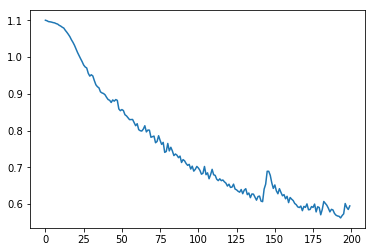

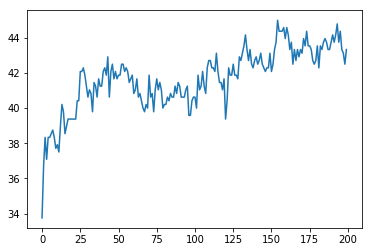

In [9]:
plt.plot(epoch_losses)
plt.show()
plt.plot(epoch_accuracies)
plt.show()

In [10]:
max(epoch_accuracies)

45.0

## Save model and scaler

In [11]:
torch.save(model.state_dict(), "passive_mass_model.pt")

In [20]:
joblib.dump(scaler, "passive_mass_scaler.sk")

['passive_mass_scaler.sk']

## Load model and evaluate

In [12]:
model = ComplexRNNModel(input_dim, first_hidden_dim, second_hidden_dim, output_dim)
model.load_state_dict(torch.load("passive_mass_model.pt"))
model.eval()
model = model.cuda()

In [13]:
accuracy, predicted = evaluate(model, val_loader, return_predicted=True)

In [14]:
print(accuracy)

43.333333333333336


In [15]:
predicted = [pred.cpu() for pred in predicted]
Y_val = np.concatenate([y.cpu().numpy() for x, y in val_loader])

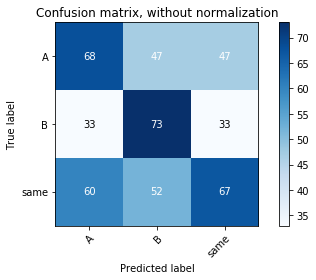

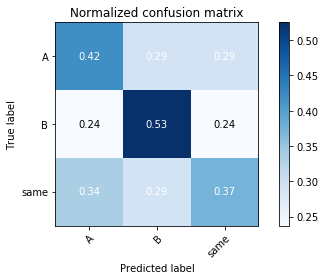

In [16]:
plot_confusion_matrix(Y_val, predicted, classes=MASS_CLASS_COLS, normalize=False)
plot_confusion_matrix(Y_val, predicted, classes=MASS_CLASS_COLS, normalize=True)

# FORCE TRAINING (max so far 53%)

## Read dataset and preprocess it

In [21]:
all_trials = read_dataset("passive_trials.h5")
train_loader, val_loader, scaler = prepare_dataset(all_trials, FORCE_CLASS_COLS, 
                                                   normalise_data=True, batch_size=128, test_size=0.3)

In [22]:
Y = []
for x,y in train_loader:
    
    Y.extend(list(y))

counts = np.unique(Y, return_counts=True)[1]

In [23]:
print("Majority class: ", np.max(counts) / np.sum(counts))

Majority class:  0.3508928571428571


## Define model, loss and optimizer

In [24]:
np.random.seed(0)
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

input_dim = len(BASIC_TRAINING_COLS)    # input dimension
first_hidden_dim = 12  # hidden layer dimension
second_hidden_dim = 6     # number of hidden layers
output_dim = 3   # output dimension

model = ComplexRNNModel(input_dim, first_hidden_dim, second_hidden_dim, output_dim)
model = model.cuda()

error = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Train model and plot loss and accuracy

In [25]:
epoch_losses, epoch_accuracies = training_loop(model, optimizer, error, train_loader, val_loader, num_epochs=200)

  0%|          | 1/200 [00:01<04:02,  1.22s/it]

1.1009775267706976 34.583333333333336


  1%|          | 2/200 [00:02<04:01,  1.22s/it]

1.0994532240761652 36.041666666666664


  2%|▏         | 3/200 [00:03<03:54,  1.19s/it]

1.0981725851694744 36.666666666666664


  2%|▏         | 4/200 [00:04<03:51,  1.18s/it]

1.096675607893202 35.208333333333336


  2%|▎         | 5/200 [00:06<03:56,  1.21s/it]

1.0948920647303264 36.041666666666664


  3%|▎         | 6/200 [00:07<03:59,  1.24s/it]

1.0944513744778104 37.5


  4%|▎         | 7/200 [00:08<04:00,  1.25s/it]

1.0925218264261882 38.333333333333336


  4%|▍         | 8/200 [00:09<03:53,  1.22s/it]

1.0912900765736897 39.791666666666664


  4%|▍         | 9/200 [00:10<03:49,  1.20s/it]

1.0891261498133342 40.0


  5%|▌         | 10/200 [00:12<03:44,  1.18s/it]

1.086701061990526 40.833333333333336


  6%|▌         | 11/200 [00:13<03:38,  1.16s/it]

1.0822966761059232 41.458333333333336


  6%|▌         | 12/200 [00:14<03:37,  1.16s/it]

1.0785657034979925 41.875


  6%|▋         | 13/200 [00:15<03:46,  1.21s/it]

1.073672850926717 41.25


  7%|▋         | 14/200 [00:16<03:52,  1.25s/it]

1.0688814851972792 42.291666666666664


  8%|▊         | 15/200 [00:18<03:47,  1.23s/it]

1.0614074336157904 41.666666666666664


  8%|▊         | 16/200 [00:19<03:34,  1.17s/it]

1.0534395509295993 42.083333333333336


  8%|▊         | 17/200 [00:20<03:23,  1.11s/it]

1.0432837936613295 41.666666666666664


  9%|▉         | 18/200 [00:21<03:14,  1.07s/it]

1.0333277781804402 41.25


 10%|▉         | 19/200 [00:22<03:08,  1.04s/it]

1.0242029296027289 41.041666666666664


 10%|█         | 20/200 [00:23<03:03,  1.02s/it]

1.010770320892334 40.416666666666664


 10%|█         | 21/200 [00:24<03:00,  1.01s/it]

0.9982006748517355 41.25


 11%|█         | 22/200 [00:25<02:58,  1.00s/it]

0.9904559652010599 42.5


 12%|█▏        | 23/200 [00:25<02:56,  1.00it/s]

0.9791719847255282 44.166666666666664


 12%|█▏        | 24/200 [00:27<02:57,  1.01s/it]

0.9639549718962775 42.916666666666664


 12%|█▎        | 25/200 [00:28<02:56,  1.01s/it]

0.9563518828815885 42.916666666666664


 13%|█▎        | 26/200 [00:29<02:55,  1.01s/it]

0.9541304442617629 42.083333333333336


 14%|█▎        | 27/200 [00:30<03:10,  1.10s/it]

0.9445714486969842 41.666666666666664


 14%|█▍        | 28/200 [00:31<03:16,  1.14s/it]

0.9371517035696242 41.25


 14%|█▍        | 29/200 [00:32<03:16,  1.15s/it]

0.9266813860999213 42.916666666666664


 15%|█▌        | 30/200 [00:34<03:20,  1.18s/it]

0.9138452675607469 43.75


 16%|█▌        | 31/200 [00:35<03:15,  1.16s/it]

0.9083468185530769 43.958333333333336


 16%|█▌        | 32/200 [00:36<03:09,  1.13s/it]

0.8982387582461039 44.791666666666664


 16%|█▋        | 33/200 [00:37<03:05,  1.11s/it]

0.8916158676147461 44.791666666666664


 17%|█▋        | 34/200 [00:38<03:01,  1.10s/it]

0.8811238143179152 45.416666666666664


 18%|█▊        | 35/200 [00:39<02:57,  1.08s/it]

0.8809409803814359 45.0


 18%|█▊        | 36/200 [00:40<02:54,  1.06s/it]

0.8689161009258695 44.583333333333336


 18%|█▊        | 37/200 [00:41<02:52,  1.06s/it]

0.8584640953275893 45.0


 19%|█▉        | 38/200 [00:42<02:49,  1.04s/it]

0.8547859191894531 46.875


 20%|█▉        | 39/200 [00:43<02:45,  1.03s/it]

0.849486357635922 45.833333333333336


 20%|██        | 40/200 [00:44<02:44,  1.03s/it]

0.8447886837853326 46.666666666666664


 20%|██        | 41/200 [00:45<02:43,  1.03s/it]

0.8409905831019083 46.666666666666664


 21%|██        | 42/200 [00:46<02:42,  1.03s/it]

0.8371721969710456 45.833333333333336


 22%|██▏       | 43/200 [00:47<02:40,  1.02s/it]

0.8310718668831719 46.041666666666664


 22%|██▏       | 44/200 [00:48<02:39,  1.02s/it]

0.8218535979588827 45.625


 22%|██▎       | 45/200 [00:49<02:41,  1.04s/it]

0.8155217435624864 44.791666666666664


 23%|██▎       | 46/200 [00:50<02:41,  1.05s/it]

0.8090995285246108 45.625


 24%|██▎       | 47/200 [00:51<02:45,  1.08s/it]

0.8063884509934319 45.208333333333336


 24%|██▍       | 48/200 [00:52<02:43,  1.08s/it]

0.799407958984375 46.041666666666664


 24%|██▍       | 49/200 [00:54<02:46,  1.10s/it]

0.7958953380584717 45.625


 25%|██▌       | 50/200 [00:55<02:45,  1.10s/it]

0.7917762531174554 45.833333333333336


 26%|██▌       | 51/200 [00:56<02:50,  1.15s/it]

0.7904614475038316 45.833333333333336


 26%|██▌       | 52/200 [00:57<02:54,  1.18s/it]

0.7872151533762614 46.875


 26%|██▋       | 53/200 [00:58<02:52,  1.17s/it]

0.78675643603007 46.25


 27%|██▋       | 54/200 [00:59<02:49,  1.16s/it]

0.7822255359755622 46.666666666666664


 28%|██▊       | 55/200 [01:01<02:45,  1.14s/it]

0.7735937436421713 46.25


 28%|██▊       | 56/200 [01:02<02:41,  1.12s/it]

0.767217218875885 46.041666666666664


 28%|██▊       | 57/200 [01:03<02:41,  1.13s/it]

0.761222157213423 46.25


 29%|██▉       | 58/200 [01:04<02:38,  1.11s/it]

0.7489929795265198 46.666666666666664


 30%|██▉       | 59/200 [01:05<02:36,  1.11s/it]

0.7603719698058234 46.25


 30%|███       | 60/200 [01:06<02:40,  1.15s/it]

0.7489396267467074 46.458333333333336


 30%|███       | 61/200 [01:08<02:45,  1.19s/it]

0.7458170255025228 47.083333333333336


 31%|███       | 62/200 [01:09<02:38,  1.15s/it]

0.7463881704542372 47.291666666666664


 32%|███▏      | 63/200 [01:10<02:39,  1.16s/it]

0.7405194905069139 47.5


 32%|███▏      | 64/200 [01:11<02:37,  1.16s/it]

0.7316360010041131 47.5


 32%|███▎      | 65/200 [01:12<02:32,  1.13s/it]

0.7328737510575188 47.916666666666664


 33%|███▎      | 66/200 [01:13<02:29,  1.12s/it]

0.7256651918093363 47.708333333333336


 34%|███▎      | 67/200 [01:14<02:34,  1.16s/it]

0.7279051409827338 48.125


 34%|███▍      | 68/200 [01:15<02:27,  1.11s/it]

0.7260058124860128 48.333333333333336


 34%|███▍      | 69/200 [01:16<02:23,  1.09s/it]

0.7218286328845553 47.291666666666664


 35%|███▌      | 70/200 [01:18<02:24,  1.11s/it]

0.7161717812220255 47.291666666666664


 36%|███▌      | 71/200 [01:19<02:27,  1.14s/it]

0.7154495186275907 46.875


 36%|███▌      | 72/200 [01:20<02:30,  1.18s/it]

0.7161105540063646 47.291666666666664


 36%|███▋      | 73/200 [01:21<02:30,  1.18s/it]

0.7116707828309801 47.291666666666664


 37%|███▋      | 74/200 [01:22<02:32,  1.21s/it]

0.7063892285029093 48.541666666666664


 38%|███▊      | 75/200 [01:24<02:29,  1.20s/it]

0.7042982512050204 48.125


 38%|███▊      | 76/200 [01:25<02:28,  1.20s/it]

0.6911238365703158 48.333333333333336


 38%|███▊      | 77/200 [01:26<02:23,  1.16s/it]

0.694158673286438 48.958333333333336


 39%|███▉      | 78/200 [01:27<02:17,  1.12s/it]

0.6819872260093689 49.166666666666664


 40%|███▉      | 79/200 [01:28<02:15,  1.12s/it]

0.699317110909356 49.166666666666664


 40%|████      | 80/200 [01:29<02:17,  1.15s/it]

0.6967358986536661 49.166666666666664


 40%|████      | 81/200 [01:30<02:17,  1.15s/it]

0.6874136328697205 48.333333333333336


 41%|████      | 82/200 [01:32<02:18,  1.17s/it]

0.691442588965098 48.333333333333336


 42%|████▏     | 83/200 [01:33<02:14,  1.15s/it]

0.6866688993242052 49.375


 42%|████▏     | 84/200 [01:34<02:11,  1.13s/it]

0.6761042210790846 49.375


 42%|████▎     | 85/200 [01:35<02:08,  1.11s/it]

0.6825933257738749 48.958333333333336


 43%|████▎     | 86/200 [01:36<02:07,  1.12s/it]

0.6682300567626953 48.958333333333336


 44%|████▎     | 87/200 [01:37<02:10,  1.15s/it]

0.6857497360971239 47.708333333333336


 44%|████▍     | 88/200 [01:39<02:15,  1.21s/it]

0.681834081808726 47.916666666666664


 44%|████▍     | 89/200 [01:40<02:13,  1.21s/it]

0.6782197952270508 48.958333333333336


 45%|████▌     | 90/200 [01:41<02:09,  1.18s/it]

0.66387406984965 48.958333333333336


 46%|████▌     | 91/200 [01:42<02:05,  1.15s/it]

0.6659184230698479 48.958333333333336


 46%|████▌     | 92/200 [01:43<02:03,  1.15s/it]

0.6610788040690951 48.125


 46%|████▋     | 93/200 [01:44<02:07,  1.19s/it]

0.6528418329026964 49.166666666666664


 47%|████▋     | 94/200 [01:46<02:08,  1.22s/it]

0.653935068183475 49.375


 48%|████▊     | 95/200 [01:47<02:10,  1.25s/it]

0.641887989309099 49.166666666666664


 48%|████▊     | 96/200 [01:48<02:11,  1.26s/it]

0.6540764040417142 49.375


 48%|████▊     | 97/200 [01:50<02:09,  1.26s/it]

0.6421300835079617 48.541666666666664


 49%|████▉     | 98/200 [01:51<02:04,  1.22s/it]

0.6467757225036621 48.541666666666664


 50%|████▉     | 99/200 [01:52<02:00,  1.19s/it]

0.6458463536368476 48.75


 50%|█████     | 100/200 [01:53<01:56,  1.16s/it]

0.6353168884913126 49.166666666666664


 50%|█████     | 101/200 [01:54<01:53,  1.15s/it]

0.6430644657876756 49.166666666666664


 51%|█████     | 102/200 [01:55<01:51,  1.14s/it]

0.6259612441062927 48.125


 52%|█████▏    | 103/200 [01:56<01:49,  1.13s/it]

0.6409109830856323 48.541666666666664


 52%|█████▏    | 104/200 [01:57<01:47,  1.12s/it]

0.6601721313264635 48.75


 52%|█████▎    | 105/200 [01:58<01:45,  1.12s/it]

0.6609538727336459 48.125


 53%|█████▎    | 106/200 [02:00<01:45,  1.12s/it]

0.6482942236794366 48.75


 54%|█████▎    | 107/200 [02:01<01:44,  1.12s/it]

0.6325183510780334 48.75


 54%|█████▍    | 108/200 [02:02<01:43,  1.13s/it]

0.634489913781484 48.75


 55%|█████▍    | 109/200 [02:03<01:42,  1.13s/it]

0.6343157291412354 47.5


 55%|█████▌    | 110/200 [02:04<01:40,  1.12s/it]

0.635908861955007 47.291666666666664


 56%|█████▌    | 111/200 [02:05<01:39,  1.12s/it]

0.6373932560284933 47.708333333333336


 56%|█████▌    | 112/200 [02:06<01:38,  1.12s/it]

0.6393194264835782 47.5


 56%|█████▋    | 113/200 [02:07<01:37,  1.12s/it]

0.6280873285399543 48.75


 57%|█████▋    | 114/200 [02:09<01:36,  1.12s/it]

0.6362145808007982 48.541666666666664


 57%|█████▊    | 115/200 [02:10<01:34,  1.11s/it]

0.6214680274327596 48.541666666666664


 58%|█████▊    | 116/200 [02:11<01:33,  1.12s/it]

0.6311492125193278 47.916666666666664


 58%|█████▊    | 117/200 [02:12<01:32,  1.11s/it]

0.6261482702361213 48.125


 59%|█████▉    | 118/200 [02:13<01:30,  1.11s/it]

0.6147795650694106 48.958333333333336


 60%|█████▉    | 119/200 [02:14<01:29,  1.10s/it]

0.6275196671485901 48.958333333333336


 60%|██████    | 120/200 [02:15<01:27,  1.10s/it]

0.611321767171224 49.583333333333336


 60%|██████    | 121/200 [02:16<01:26,  1.10s/it]

0.6177096896701388 48.75


 61%|██████    | 122/200 [02:17<01:25,  1.10s/it]

0.609179867638482 48.333333333333336


 62%|██████▏   | 123/200 [02:18<01:24,  1.10s/it]

0.6129772464434305 48.958333333333336


 62%|██████▏   | 124/200 [02:20<01:23,  1.10s/it]

0.6032661000887553 49.375


 62%|██████▎   | 125/200 [02:21<01:23,  1.11s/it]

0.6045976877212524 48.75


 63%|██████▎   | 126/200 [02:22<01:22,  1.11s/it]

0.6034715705447726 49.583333333333336


 64%|██████▎   | 127/200 [02:23<01:20,  1.10s/it]

0.6009088158607483 50.416666666666664


 64%|██████▍   | 128/200 [02:24<01:18,  1.09s/it]

0.5978361765543619 49.375


 64%|██████▍   | 129/200 [02:25<01:16,  1.08s/it]

0.633315192328559 49.583333333333336


 65%|██████▌   | 130/200 [02:26<01:14,  1.07s/it]

0.6415391365687052 48.958333333333336


 66%|██████▌   | 131/200 [02:27<01:13,  1.06s/it]

0.6414703130722046 49.166666666666664


 66%|██████▌   | 132/200 [02:28<01:12,  1.07s/it]

0.6342114806175232 49.583333333333336


 66%|██████▋   | 133/200 [02:29<01:11,  1.07s/it]

0.6227682299084134 49.583333333333336


 67%|██████▋   | 134/200 [02:30<01:10,  1.08s/it]

0.627493249045478 47.708333333333336


 68%|██████▊   | 135/200 [02:31<01:09,  1.07s/it]

0.6346177392535739 48.125


 68%|██████▊   | 136/200 [02:32<01:08,  1.06s/it]

0.6295276747809516 47.916666666666664


 68%|██████▊   | 137/200 [02:34<01:08,  1.08s/it]

0.6084252860811021 49.166666666666664


 69%|██████▉   | 138/200 [02:35<01:07,  1.10s/it]

0.6171344982253181 48.541666666666664


 70%|██████▉   | 139/200 [02:36<01:06,  1.10s/it]

0.5935677223735385 49.166666666666664


 70%|███████   | 140/200 [02:37<01:05,  1.10s/it]

0.5950745476616753 49.375


 70%|███████   | 141/200 [02:38<01:04,  1.10s/it]

0.5936544603771634 50.208333333333336


 71%|███████   | 142/200 [02:39<01:03,  1.10s/it]

0.5843710965580411 49.791666666666664


 72%|███████▏  | 143/200 [02:40<01:02,  1.09s/it]

0.5889572037590874 50.208333333333336


 72%|███████▏  | 144/200 [02:41<01:01,  1.09s/it]

0.5845442546738518 49.583333333333336


 72%|███████▎  | 145/200 [02:42<01:00,  1.10s/it]

0.5867138703664144 50.0


 73%|███████▎  | 146/200 [02:43<00:58,  1.09s/it]

0.5930147038565742 49.791666666666664


 74%|███████▎  | 147/200 [02:45<00:57,  1.09s/it]

0.577292799949646 49.166666666666664


 74%|███████▍  | 148/200 [02:46<00:56,  1.09s/it]

0.5788240101602342 49.375


 74%|███████▍  | 149/200 [02:47<00:55,  1.08s/it]

0.5819183190663656 48.958333333333336


 75%|███████▌  | 150/200 [02:48<00:54,  1.09s/it]

0.5709101027912564 48.75


 76%|███████▌  | 151/200 [02:49<00:52,  1.08s/it]

0.5617690980434418 49.375


 76%|███████▌  | 152/200 [02:50<00:51,  1.07s/it]

0.5678191979726156 50.416666666666664


 76%|███████▋  | 153/200 [02:51<00:50,  1.07s/it]

0.5564097728994157 50.833333333333336


 77%|███████▋  | 154/200 [02:52<00:49,  1.07s/it]

0.5992992056740655 49.791666666666664


 78%|███████▊  | 155/200 [02:53<00:48,  1.07s/it]

0.602345433500078 50.625


 78%|███████▊  | 156/200 [02:54<00:47,  1.07s/it]

0.6035167177518209 52.083333333333336


 78%|███████▊  | 157/200 [02:55<00:45,  1.07s/it]

0.5897531906763712 52.916666666666664


 79%|███████▉  | 158/200 [02:56<00:44,  1.06s/it]

0.5975395109918382 52.916666666666664


 80%|███████▉  | 159/200 [02:57<00:44,  1.07s/it]

0.5861104925473531 51.875


 80%|████████  | 160/200 [02:59<00:43,  1.09s/it]

0.5920558240678575 52.5


 80%|████████  | 161/200 [03:00<00:42,  1.10s/it]

0.5815816587871976 52.5


 81%|████████  | 162/200 [03:01<00:41,  1.10s/it]

0.57450270652771 52.708333333333336


 82%|████████▏ | 163/200 [03:02<00:40,  1.08s/it]

0.5836672650443183 52.5


 82%|████████▏ | 164/200 [03:03<00:38,  1.08s/it]

0.5800831781493293 52.916666666666664


 82%|████████▎ | 165/200 [03:04<00:37,  1.07s/it]

0.5626111394829221 52.708333333333336


 83%|████████▎ | 166/200 [03:05<00:36,  1.07s/it]

0.5715930395656161 52.708333333333336


 84%|████████▎ | 167/200 [03:06<00:35,  1.07s/it]

0.5631174577607049 52.291666666666664


 84%|████████▍ | 168/200 [03:07<00:34,  1.08s/it]

0.5757175948884752 52.291666666666664


 84%|████████▍ | 169/200 [03:08<00:33,  1.08s/it]

0.5729402303695679 52.291666666666664


 85%|████████▌ | 170/200 [03:09<00:32,  1.09s/it]

0.5603827635447184 52.291666666666664


 86%|████████▌ | 171/200 [03:10<00:31,  1.09s/it]

0.5686812831295861 51.875


 86%|████████▌ | 172/200 [03:12<00:30,  1.09s/it]

0.5596120754877726 51.875


 86%|████████▋ | 173/200 [03:13<00:30,  1.12s/it]

0.5576511886384752 52.083333333333336


 87%|████████▋ | 174/200 [03:14<00:29,  1.13s/it]

0.5567149387465583 51.666666666666664


 88%|████████▊ | 175/200 [03:15<00:28,  1.13s/it]

0.5547384586599138 52.083333333333336


 88%|████████▊ | 176/200 [03:16<00:26,  1.12s/it]

0.5554446743594276 52.708333333333336


 88%|████████▊ | 177/200 [03:17<00:25,  1.12s/it]

0.551755878660414 52.5


 89%|████████▉ | 178/200 [03:18<00:24,  1.11s/it]

0.5443758832083808 53.125


 90%|████████▉ | 179/200 [03:19<00:23,  1.11s/it]

0.549400250116984 52.916666666666664


 90%|█████████ | 180/200 [03:20<00:21,  1.10s/it]

0.5491152273284065 51.875


 90%|█████████ | 181/200 [03:22<00:20,  1.10s/it]

0.5461654199494256 51.041666666666664


 91%|█████████ | 182/200 [03:23<00:19,  1.09s/it]

0.5448077619075775 51.041666666666664


 92%|█████████▏| 183/200 [03:24<00:18,  1.09s/it]

0.5465024477905698 50.833333333333336


 92%|█████████▏| 184/200 [03:25<00:17,  1.08s/it]

0.5501605239179399 50.833333333333336


 92%|█████████▎| 185/200 [03:26<00:16,  1.09s/it]

0.5511951214737363 50.625


 93%|█████████▎| 186/200 [03:27<00:15,  1.08s/it]

0.5421302318572998 50.208333333333336


 94%|█████████▎| 187/200 [03:28<00:14,  1.08s/it]

0.5514208277066549 51.041666666666664


 94%|█████████▍| 188/200 [03:29<00:12,  1.07s/it]

0.5468534727891287 51.041666666666664


 94%|█████████▍| 189/200 [03:30<00:11,  1.07s/it]

0.5497528513272604 51.875


 95%|█████████▌| 190/200 [03:31<00:10,  1.07s/it]

0.5405530962679121 51.25


 96%|█████████▌| 191/200 [03:32<00:09,  1.07s/it]

0.5341976318094466 52.083333333333336


 96%|█████████▌| 192/200 [03:33<00:08,  1.07s/it]

0.548242472940021 51.666666666666664


 96%|█████████▋| 193/200 [03:34<00:07,  1.08s/it]

0.5150895416736603 51.666666666666664


 97%|█████████▋| 194/200 [03:36<00:06,  1.08s/it]

0.5334708491961161 52.291666666666664


 98%|█████████▊| 195/200 [03:37<00:05,  1.09s/it]

0.5432877408133613 52.291666666666664


 98%|█████████▊| 196/200 [03:38<00:04,  1.10s/it]

0.5393650763564639 53.125


 98%|█████████▊| 197/200 [03:39<00:03,  1.10s/it]

0.5389146308104197 52.916666666666664


 99%|█████████▉| 198/200 [03:40<00:02,  1.08s/it]

0.5423092378510369 51.875


100%|█████████▉| 199/200 [03:41<00:01,  1.10s/it]

0.5458737909793854 51.666666666666664


100%|██████████| 200/200 [03:42<00:00,  1.10s/it]

0.5355191561910841 51.666666666666664


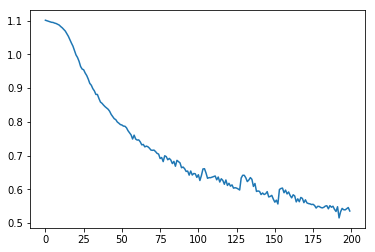

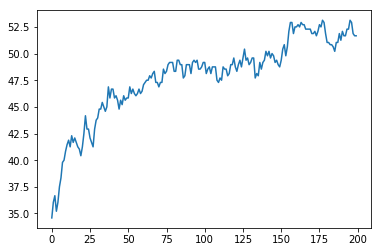

In [26]:
plt.plot(epoch_losses)
plt.show()
plt.plot(epoch_accuracies)
plt.show()

In [27]:
max(epoch_accuracies)

53.125

## Save model and scaler

In [28]:
torch.save(model.state_dict(), "passive_force_model.pt")

In [29]:
joblib.dump(scaler, "passive_force_scaler.sk")

['passive_force_scaler.sk']

## Load model and evaluate

In [30]:
model = ComplexRNNModel(input_dim, first_hidden_dim, second_hidden_dim, output_dim)
model.load_state_dict(torch.load("passive_force_model.pt"))
model.eval()
model = model.cuda()

In [31]:
accuracy, predicted = evaluate(model, val_loader, return_predicted=True)

In [32]:
print(accuracy)

51.666666666666664


In [33]:
predicted = [pred.cpu() for pred in predicted]
Y_val = np.concatenate([y.cpu().numpy() for x, y in val_loader])

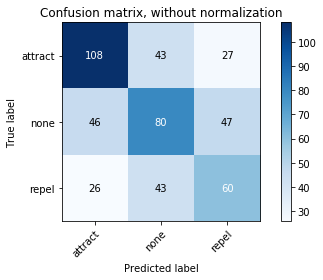

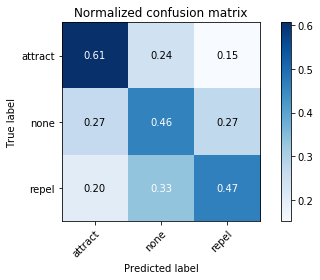

In [35]:
plot_confusion_matrix(Y_val, predicted, classes=FORCE_CLASS_COLS, normalize=False)
plot_confusion_matrix(Y_val, predicted, classes=FORCE_CLASS_COLS, normalize=True)

# FORCE TRAINING (50%)

## Read dataset and preprocess it

In [17]:
all_trials = read_dataset("passive_trials.h5")
train_loader, val_loader = prepare_dataset(all_trials, FORCE_CLASS_COLS, normalise=True, batch_size=128, test_size=0.3)

In [18]:
Y = []
for x,y in train_loader:
    
    Y.extend(list(y))

np.unique(Y, return_counts=True)

(array([tensor(0, device='cuda:0'), tensor(1, device='cuda:0'),
        tensor(2, device='cuda:0')], dtype=object), array([393, 376, 351]))

## Define model, loss and optimizer

In [19]:
np.random.seed(62)
torch.manual_seed(72)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

input_dim = len(BASIC_TRAINING_COLS)    # input dimension
first_hidden_dim = 12  # hidden layer dimension
second_hidden_dim = 6     # number of hidden layers
output_dim = 3   # output dimension

model = ComplexRNNModel(input_dim, first_hidden_dim, second_hidden_dim, output_dim)
model = model.cuda()

error = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
model.train()

ComplexRNNModel(
  (lstm): LSTM(16, 12, batch_first=True)
  (dropout): Dropout(p=0.25)
  (lstm_2): LSTM(12, 6, batch_first=True)
  (fc): Linear(in_features=6, out_features=3, bias=True)
)

## Train model and plot loss and accuracy

In [21]:
epoch_losses, epoch_accuracies = training_loop(model, optimizer, error, train_loader, val_loader, num_epochs=1000)

  0%|          | 1/1000 [00:01<20:36,  1.24s/it]

1.1147649817996554 34.166666666666664


  0%|          | 2/1000 [00:02<20:02,  1.21s/it]

1.1100632747014363 34.583333333333336


  0%|          | 3/1000 [00:03<19:36,  1.18s/it]

1.1063689258363512 34.375


  0%|          | 4/1000 [00:04<19:25,  1.17s/it]

1.103172289000617 34.375


  0%|          | 5/1000 [00:05<19:15,  1.16s/it]

1.1006716754701402 35.0


  1%|          | 6/1000 [00:06<19:17,  1.16s/it]

1.0970322953330145 35.0


  1%|          | 7/1000 [00:08<19:05,  1.15s/it]

1.09341381655799 35.208333333333336


  1%|          | 8/1000 [00:09<19:04,  1.15s/it]

1.0912335448794894 35.0


  1%|          | 9/1000 [00:10<19:02,  1.15s/it]

1.0879655679066975 35.625


  1%|          | 10/1000 [00:11<19:06,  1.16s/it]

1.0849478377236261 38.75


  1%|          | 11/1000 [00:12<18:53,  1.15s/it]

1.0812311040030584 39.583333333333336


  1%|          | 12/1000 [00:13<18:38,  1.13s/it]

1.0770965814590454 38.75


  1%|▏         | 13/1000 [00:14<18:30,  1.12s/it]

1.0730395052168105 40.0


  1%|▏         | 14/1000 [00:16<18:39,  1.14s/it]

1.066409362687005 40.625


  2%|▏         | 15/1000 [00:17<18:42,  1.14s/it]

1.061205267906189 41.458333333333336


  2%|▏         | 16/1000 [00:18<18:44,  1.14s/it]

1.0536883274714153 42.083333333333336


  2%|▏         | 17/1000 [00:19<18:40,  1.14s/it]

1.041631778081258 42.916666666666664


  2%|▏         | 18/1000 [00:20<18:48,  1.15s/it]

1.0308663182788425 43.125


  2%|▏         | 19/1000 [00:21<18:39,  1.14s/it]

1.0202743013699849 43.75


  2%|▏         | 20/1000 [00:22<18:49,  1.15s/it]

1.0064678523275588 44.375


  2%|▏         | 21/1000 [00:24<18:42,  1.15s/it]

0.9933758113119338 43.541666666666664


  2%|▏         | 22/1000 [00:25<18:34,  1.14s/it]

0.9747901691330804 43.75


  2%|▏         | 23/1000 [00:26<18:43,  1.15s/it]

0.9601196381780837 43.75


  2%|▏         | 24/1000 [00:27<18:42,  1.15s/it]

0.9434327814314101 44.791666666666664


  2%|▎         | 25/1000 [00:28<18:41,  1.15s/it]

0.9325746893882751 45.833333333333336


  3%|▎         | 26/1000 [00:29<18:38,  1.15s/it]

0.9165318409601847 47.291666666666664


  3%|▎         | 27/1000 [00:30<18:40,  1.15s/it]

0.9087045391400655 48.125


  3%|▎         | 28/1000 [00:32<18:42,  1.15s/it]

0.8944999178250631 47.291666666666664


  3%|▎         | 29/1000 [00:33<18:30,  1.14s/it]

0.8807271917661031 48.958333333333336


  3%|▎         | 30/1000 [00:34<18:41,  1.16s/it]

0.8742849893040128 50.208333333333336


  3%|▎         | 31/1000 [00:35<18:41,  1.16s/it]

0.8623648815684848 51.25


  3%|▎         | 32/1000 [00:36<18:38,  1.16s/it]

0.856732620133294 51.041666666666664


  3%|▎         | 33/1000 [00:37<18:25,  1.14s/it]

0.8482429915004306 50.833333333333336


  3%|▎         | 34/1000 [00:38<18:17,  1.14s/it]

0.8418842554092407 50.416666666666664


  4%|▎         | 35/1000 [00:40<18:22,  1.14s/it]

0.8341890441046821 50.416666666666664


  4%|▎         | 36/1000 [00:41<18:17,  1.14s/it]

0.8252058095402188 50.625


  4%|▎         | 37/1000 [00:42<18:12,  1.13s/it]

0.8183104130956862 50.208333333333336


  4%|▍         | 38/1000 [00:43<18:14,  1.14s/it]

0.8174276881747775 49.583333333333336


  4%|▍         | 39/1000 [00:44<18:07,  1.13s/it]

0.8067518870035807 50.833333333333336


  4%|▍         | 40/1000 [00:45<17:59,  1.12s/it]

0.7986413836479187 50.208333333333336


  4%|▍         | 41/1000 [00:46<18:02,  1.13s/it]

0.7920550637774997 50.208333333333336


  4%|▍         | 42/1000 [00:48<18:07,  1.13s/it]

0.7922215594185723 51.25


  4%|▍         | 43/1000 [00:49<17:59,  1.13s/it]

0.7851225799984403 50.625


  4%|▍         | 44/1000 [00:50<17:57,  1.13s/it]

0.7858010795381334 50.625


  4%|▍         | 45/1000 [00:51<18:06,  1.14s/it]

0.7830218142933316 50.208333333333336


  5%|▍         | 46/1000 [00:52<18:01,  1.13s/it]

0.7795491019884745 51.041666666666664


  5%|▍         | 47/1000 [00:53<18:03,  1.14s/it]

0.7779928379588656 50.416666666666664


  5%|▍         | 48/1000 [00:54<17:58,  1.13s/it]

0.7668505642149184 51.458333333333336


  5%|▍         | 49/1000 [00:55<17:47,  1.12s/it]

0.7695782913102044 52.5


  5%|▌         | 50/1000 [00:57<17:43,  1.12s/it]

0.7601280543539259 51.875


  5%|▌         | 51/1000 [00:58<17:41,  1.12s/it]

0.7543469799889458 51.875


  5%|▌         | 52/1000 [00:59<17:33,  1.11s/it]

0.7496333122253418 51.666666666666664


  5%|▌         | 53/1000 [01:00<17:30,  1.11s/it]

0.7492687371042039 52.083333333333336


  5%|▌         | 54/1000 [01:01<17:28,  1.11s/it]

0.7494889365302192 52.083333333333336


  6%|▌         | 55/1000 [01:02<17:34,  1.12s/it]

0.7443875670433044 51.041666666666664


  6%|▌         | 56/1000 [01:03<17:42,  1.13s/it]

0.7505816486146715 51.041666666666664


  6%|▌         | 57/1000 [01:04<17:41,  1.13s/it]

0.750938249958886 51.25


  6%|▌         | 58/1000 [01:06<17:48,  1.13s/it]

0.7480920884344313 50.833333333333336


  6%|▌         | 59/1000 [01:07<17:42,  1.13s/it]

0.7488974332809448 51.25


  6%|▌         | 60/1000 [01:08<17:34,  1.12s/it]

0.7410924567116631 51.666666666666664


  6%|▌         | 61/1000 [01:09<17:27,  1.12s/it]

0.7325427929560343 52.083333333333336


  6%|▌         | 62/1000 [01:10<17:23,  1.11s/it]

0.732166588306427 51.666666666666664


  6%|▋         | 63/1000 [01:11<17:31,  1.12s/it]

0.7345225943459405 51.875


  6%|▋         | 64/1000 [01:12<17:27,  1.12s/it]

0.7293622626198663 52.083333333333336


  6%|▋         | 65/1000 [01:13<17:22,  1.12s/it]

0.7316574917899238 50.625


  7%|▋         | 66/1000 [01:14<17:24,  1.12s/it]

0.7643704679277208 50.416666666666664


  7%|▋         | 67/1000 [01:16<17:15,  1.11s/it]

0.7523343563079834 51.041666666666664


  7%|▋         | 68/1000 [01:17<17:14,  1.11s/it]

0.74765588177575 51.25


  7%|▋         | 69/1000 [01:18<17:12,  1.11s/it]

0.736206160651313 52.083333333333336


  7%|▋         | 70/1000 [01:19<17:10,  1.11s/it]

0.730471326245202 52.291666666666664


  7%|▋         | 71/1000 [01:20<17:07,  1.11s/it]

0.7231123579872979 52.083333333333336


  7%|▋         | 72/1000 [01:21<17:06,  1.11s/it]

0.726715452141232 51.875


  7%|▋         | 73/1000 [01:22<17:10,  1.11s/it]

0.7189871138996549 51.25


  7%|▋         | 74/1000 [01:23<17:20,  1.12s/it]

0.7232498659027947 52.083333333333336


  8%|▊         | 75/1000 [01:25<17:25,  1.13s/it]

0.7128380470805697 52.5


  8%|▊         | 76/1000 [01:26<17:28,  1.13s/it]

0.7087518705262078 52.083333333333336


  8%|▊         | 77/1000 [01:27<17:19,  1.13s/it]

0.7163715428776212 52.291666666666664


  8%|▊         | 78/1000 [01:28<17:20,  1.13s/it]

0.7080748081207275 52.5


  8%|▊         | 79/1000 [01:29<17:26,  1.14s/it]

0.6961697869830661 52.291666666666664


  8%|▊         | 80/1000 [01:30<17:21,  1.13s/it]

0.7013047801123725 51.875


  8%|▊         | 81/1000 [01:31<17:18,  1.13s/it]

0.7026743491490682 52.083333333333336


  8%|▊         | 82/1000 [01:32<17:19,  1.13s/it]

0.7016144394874573 52.083333333333336


  8%|▊         | 83/1000 [01:34<17:15,  1.13s/it]

0.6945368713802762 51.875


  8%|▊         | 84/1000 [01:35<17:15,  1.13s/it]

0.6961620383792453 52.291666666666664


  8%|▊         | 85/1000 [01:36<17:19,  1.14s/it]

0.6913179092937045 52.083333333333336


  9%|▊         | 86/1000 [01:37<17:12,  1.13s/it]

0.6817854046821594 52.291666666666664


  9%|▊         | 87/1000 [01:38<17:08,  1.13s/it]

0.688262422879537 52.291666666666664


  9%|▉         | 88/1000 [01:39<17:04,  1.12s/it]

0.7129616406228807 52.083333333333336


  9%|▉         | 89/1000 [01:40<17:04,  1.12s/it]

0.7021684779061211 50.833333333333336


  9%|▉         | 90/1000 [01:41<17:06,  1.13s/it]

0.7003484235869514 50.625


  9%|▉         | 91/1000 [01:43<17:09,  1.13s/it]

0.6920409070120918 50.625


  9%|▉         | 92/1000 [01:44<17:06,  1.13s/it]

0.6842804948488871 50.833333333333336


  9%|▉         | 93/1000 [01:45<17:09,  1.14s/it]

0.6778588824801974 51.041666666666664


  9%|▉         | 94/1000 [01:46<17:11,  1.14s/it]

0.6692200038168166 51.875


 10%|▉         | 95/1000 [01:47<17:14,  1.14s/it]

0.6801338063346015 52.291666666666664


 10%|▉         | 96/1000 [01:48<17:15,  1.15s/it]

0.6712325016657511 52.708333333333336


 10%|▉         | 97/1000 [01:49<17:12,  1.14s/it]

0.6722168591287401 51.875


 10%|▉         | 98/1000 [01:51<17:08,  1.14s/it]

0.6783866021368239 51.458333333333336


 10%|▉         | 99/1000 [01:52<17:17,  1.15s/it]

0.6667295959260728 52.083333333333336


 10%|█         | 100/1000 [01:53<17:13,  1.15s/it]

0.669300205177731 52.916666666666664


 10%|█         | 101/1000 [01:54<17:14,  1.15s/it]

0.670117199420929 53.125


 10%|█         | 102/1000 [01:55<17:08,  1.14s/it]

0.6585440701908536 52.916666666666664


 10%|█         | 103/1000 [01:56<17:04,  1.14s/it]

0.6644666526052687 53.333333333333336


 10%|█         | 104/1000 [01:57<17:05,  1.14s/it]

0.6511533591482375 53.333333333333336


 10%|█         | 105/1000 [01:59<16:55,  1.13s/it]

0.6643016934394836 52.5


 11%|█         | 106/1000 [02:00<16:51,  1.13s/it]

0.6661727163526747 52.5


 11%|█         | 107/1000 [02:01<16:56,  1.14s/it]

0.6500272022353278 51.25


 11%|█         | 108/1000 [02:02<16:58,  1.14s/it]

0.6659195886717902 51.666666666666664


 11%|█         | 109/1000 [02:03<16:53,  1.14s/it]

0.6668842103746202 51.041666666666664


 11%|█         | 110/1000 [02:04<16:47,  1.13s/it]

0.6775093211068047 51.666666666666664


 11%|█         | 111/1000 [02:05<16:55,  1.14s/it]

0.6663529276847839 51.875


 11%|█         | 112/1000 [02:07<16:46,  1.13s/it]

0.6661891473664178 51.041666666666664


 11%|█▏        | 113/1000 [02:08<16:43,  1.13s/it]

0.6670361426141527 51.25


 11%|█▏        | 114/1000 [02:09<16:49,  1.14s/it]

0.6628546383645799 50.416666666666664


 12%|█▏        | 115/1000 [02:10<16:46,  1.14s/it]

0.6554344892501831 50.833333333333336


 12%|█▏        | 116/1000 [02:11<16:52,  1.15s/it]

0.6462604469723172 50.416666666666664


 12%|█▏        | 117/1000 [02:12<16:50,  1.14s/it]

0.6516856220033433 51.875


 12%|█▏        | 118/1000 [02:13<16:51,  1.15s/it]

0.6469310786989 50.833333333333336


 12%|█▏        | 119/1000 [02:15<16:48,  1.15s/it]

0.6459657814767625 52.291666666666664


 12%|█▏        | 120/1000 [02:16<16:48,  1.15s/it]

0.6341655453046163 51.875


 12%|█▏        | 121/1000 [02:17<16:51,  1.15s/it]

0.6362395485242208 52.083333333333336


 12%|█▏        | 122/1000 [02:18<16:52,  1.15s/it]

0.6383868720796373 51.875


 12%|█▏        | 123/1000 [02:19<16:46,  1.15s/it]

0.638790123992496 51.25


 12%|█▏        | 124/1000 [02:20<16:55,  1.16s/it]

0.6355361209975349 51.666666666666664


 12%|█▎        | 125/1000 [02:21<16:46,  1.15s/it]

0.6287021173371209 50.833333333333336


 13%|█▎        | 126/1000 [02:23<16:43,  1.15s/it]

0.6401457455423143 51.875


 13%|█▎        | 127/1000 [02:24<16:40,  1.15s/it]

0.6319652332199944 51.666666666666664


 13%|█▎        | 128/1000 [02:25<16:42,  1.15s/it]

0.6306056049134996 51.25


 13%|█▎        | 129/1000 [02:26<16:43,  1.15s/it]

0.6399650772412618 50.833333333333336


 13%|█▎        | 130/1000 [02:27<16:41,  1.15s/it]

0.6680299441019694 52.291666666666664


 13%|█▎        | 131/1000 [02:28<16:37,  1.15s/it]

0.6526871389812894 51.875


 13%|█▎        | 132/1000 [02:30<16:31,  1.14s/it]

0.6266108817524381 51.458333333333336


 13%|█▎        | 133/1000 [02:31<16:36,  1.15s/it]

0.6318294935756259 51.875


 13%|█▎        | 134/1000 [02:32<16:31,  1.15s/it]

0.6502086056603326 50.625


 14%|█▎        | 135/1000 [02:33<16:31,  1.15s/it]

0.6541386710272895 51.875


 14%|█▎        | 136/1000 [02:34<16:32,  1.15s/it]

0.6504379378424751 50.625


 14%|█▎        | 137/1000 [02:35<16:27,  1.14s/it]

0.635762996143765 51.25


 14%|█▍        | 138/1000 [02:36<16:33,  1.15s/it]

0.6417120827568902 51.25


 14%|█▍        | 139/1000 [02:38<16:27,  1.15s/it]

0.6319195826848348 51.041666666666664


 14%|█▍        | 140/1000 [02:39<16:21,  1.14s/it]

0.6444302399953207 50.0


 14%|█▍        | 141/1000 [02:40<16:26,  1.15s/it]

0.642898248301612 49.791666666666664


 14%|█▍        | 142/1000 [02:41<16:21,  1.14s/it]

0.6373839908175998 50.208333333333336


 14%|█▍        | 143/1000 [02:42<16:16,  1.14s/it]

0.629259102874332 50.0


 14%|█▍        | 144/1000 [02:43<16:19,  1.14s/it]

0.6302866869502597 50.208333333333336


 14%|█▍        | 145/1000 [02:44<16:16,  1.14s/it]

0.6243064535988702 50.208333333333336


 15%|█▍        | 146/1000 [02:46<16:09,  1.14s/it]

0.6176059444745382 50.0


 15%|█▍        | 147/1000 [02:47<16:15,  1.14s/it]

0.6255371636814542 51.041666666666664


 15%|█▍        | 148/1000 [02:48<16:14,  1.14s/it]

0.6166175471411811 52.291666666666664


 15%|█▍        | 149/1000 [02:49<16:12,  1.14s/it]

0.6167071329222785 51.875


 15%|█▌        | 150/1000 [02:50<16:05,  1.14s/it]

0.6211374269591438 51.458333333333336


 15%|█▌        | 151/1000 [02:51<16:03,  1.13s/it]

0.6348866489198473 50.0


 15%|█▌        | 152/1000 [02:52<16:04,  1.14s/it]

0.6911287638876173 49.791666666666664


 15%|█▌        | 153/1000 [02:54<16:08,  1.14s/it]

0.6846401823891534 50.0


 15%|█▌        | 154/1000 [02:55<16:05,  1.14s/it]

0.6613441771931119 49.166666666666664


 16%|█▌        | 155/1000 [02:56<16:00,  1.14s/it]

0.6766092777252197 50.416666666666664


 16%|█▌        | 156/1000 [02:57<16:06,  1.15s/it]

0.6715302268664042 51.25


 16%|█▌        | 157/1000 [02:58<16:00,  1.14s/it]

0.6718539595603943 50.625


 16%|█▌        | 158/1000 [02:59<16:05,  1.15s/it]

0.6477668417824639 50.208333333333336


 16%|█▌        | 159/1000 [03:00<15:57,  1.14s/it]

0.6484740244017707 50.208333333333336


 16%|█▌        | 160/1000 [03:01<15:52,  1.13s/it]

0.6539657976892259 50.208333333333336


 16%|█▌        | 161/1000 [03:03<15:47,  1.13s/it]

0.6440571082962884 51.25


 16%|█▌        | 162/1000 [03:04<15:41,  1.12s/it]

0.6443180176946852 51.458333333333336


 16%|█▋        | 163/1000 [03:05<15:51,  1.14s/it]

0.6235150959756639 51.666666666666664


 16%|█▋        | 164/1000 [03:06<15:54,  1.14s/it]

0.6344431837399801 51.458333333333336


 16%|█▋        | 165/1000 [03:07<15:59,  1.15s/it]

0.62796417872111 51.458333333333336


 17%|█▋        | 166/1000 [03:08<15:51,  1.14s/it]

0.6251576807763841 51.458333333333336


 17%|█▋        | 167/1000 [03:09<15:49,  1.14s/it]

0.6298926538891263 51.25


 17%|█▋        | 168/1000 [03:11<15:49,  1.14s/it]

0.6112580365604825 51.666666666666664


 17%|█▋        | 169/1000 [03:12<15:48,  1.14s/it]

0.6219381623797946 51.25


 17%|█▋        | 170/1000 [03:13<15:41,  1.13s/it]

0.6149575975206163 50.625


 17%|█▋        | 171/1000 [03:14<15:42,  1.14s/it]

0.6120098564359877 50.625


 17%|█▋        | 172/1000 [03:15<15:46,  1.14s/it]

0.6129452983538309 50.416666666666664


 17%|█▋        | 173/1000 [03:16<15:35,  1.13s/it]

0.6000529527664185 50.625


 17%|█▋        | 174/1000 [03:17<15:30,  1.13s/it]

0.6193717850579156 51.041666666666664


 18%|█▊        | 175/1000 [03:18<15:26,  1.12s/it]

0.6050048900975121 51.458333333333336


 18%|█▊        | 176/1000 [03:20<15:33,  1.13s/it]

0.6038476427396139 51.666666666666664


 18%|█▊        | 177/1000 [03:21<15:35,  1.14s/it]

0.6053165793418884 51.875


 18%|█▊        | 178/1000 [03:22<15:45,  1.15s/it]

0.6055978536605835 51.25


 18%|█▊        | 179/1000 [03:23<15:50,  1.16s/it]

0.6085200177298652 50.625


 18%|█▊        | 180/1000 [03:24<15:39,  1.15s/it]

0.6056315203507742 49.791666666666664


 18%|█▊        | 181/1000 [03:25<15:30,  1.14s/it]

0.5956088701883951 50.625


 18%|█▊        | 182/1000 [03:27<15:28,  1.13s/it]

0.6011304789119296 49.791666666666664


 18%|█▊        | 183/1000 [03:28<15:30,  1.14s/it]

0.6066853867636787 50.833333333333336


 18%|█▊        | 184/1000 [03:29<15:22,  1.13s/it]

0.6168924901220534 51.666666666666664


 18%|█▊        | 185/1000 [03:30<15:29,  1.14s/it]

0.6130002670817905 51.041666666666664


 19%|█▊        | 186/1000 [03:31<15:35,  1.15s/it]

0.6041261023945279 51.458333333333336


 19%|█▊        | 187/1000 [03:32<15:32,  1.15s/it]

0.5861764980687035 51.041666666666664


 19%|█▉        | 188/1000 [03:33<15:30,  1.15s/it]

0.5984367032845815 51.041666666666664


 19%|█▉        | 189/1000 [03:35<15:28,  1.15s/it]

0.599199566576216 50.416666666666664


 19%|█▉        | 190/1000 [03:36<15:27,  1.15s/it]

0.6012456582652198 51.875


 19%|█▉        | 191/1000 [03:37<15:26,  1.15s/it]

0.5933503044976128 52.083333333333336


 19%|█▉        | 192/1000 [03:38<15:23,  1.14s/it]

0.5934533145692613 52.083333333333336


 19%|█▉        | 193/1000 [03:39<15:17,  1.14s/it]

0.593965619802475 51.25


 19%|█▉        | 194/1000 [03:40<15:11,  1.13s/it]

0.6011356810728709 51.25


 20%|█▉        | 195/1000 [03:41<15:10,  1.13s/it]

0.5855995780891843 50.833333333333336


 20%|█▉        | 196/1000 [03:42<15:10,  1.13s/it]

0.5807734496063657 50.833333333333336


 20%|█▉        | 197/1000 [03:44<15:03,  1.13s/it]

0.5942076146602631 51.041666666666664


 20%|█▉        | 198/1000 [03:45<15:01,  1.12s/it]

0.5779956777890524 50.416666666666664


 20%|█▉        | 199/1000 [03:46<15:09,  1.14s/it]

0.570193479458491 50.416666666666664


 20%|██        | 200/1000 [03:47<15:01,  1.13s/it]

0.5734684136178758 49.791666666666664


 20%|██        | 201/1000 [03:48<14:58,  1.12s/it]

0.5743880305025313 49.375


 20%|██        | 202/1000 [03:49<15:01,  1.13s/it]

0.5815354751216041 49.583333333333336


 20%|██        | 203/1000 [03:50<15:03,  1.13s/it]

0.5736599299642775 49.583333333333336


 20%|██        | 204/1000 [03:52<15:12,  1.15s/it]

0.5787178642219968 50.208333333333336


 20%|██        | 205/1000 [03:53<15:06,  1.14s/it]

0.5775032175911797 51.25


 21%|██        | 206/1000 [03:54<15:00,  1.13s/it]

0.5765600370036231 50.625


 21%|██        | 207/1000 [03:55<14:59,  1.13s/it]

0.5620245337486267 50.833333333333336


 21%|██        | 208/1000 [03:56<14:59,  1.14s/it]

0.5650019182099236 50.625


 21%|██        | 209/1000 [03:57<14:56,  1.13s/it]

0.5726834138234457 50.625


 21%|██        | 210/1000 [03:58<14:56,  1.14s/it]

0.5681857135560777 52.083333333333336


 21%|██        | 211/1000 [03:59<14:54,  1.13s/it]

0.5774986180994246 52.5


 21%|██        | 212/1000 [04:01<15:02,  1.15s/it]

0.5662490063243442 51.875


 21%|██▏       | 213/1000 [04:02<14:54,  1.14s/it]

0.5559299952454038 51.666666666666664


 21%|██▏       | 214/1000 [04:03<14:53,  1.14s/it]

0.6658753156661987 47.708333333333336


 22%|██▏       | 215/1000 [04:04<14:49,  1.13s/it]

0.8370860285229154 46.458333333333336


 22%|██▏       | 216/1000 [04:05<14:54,  1.14s/it]

0.8898811936378479 46.458333333333336


 22%|██▏       | 217/1000 [04:06<14:48,  1.13s/it]

0.8249460856119791 47.5


 22%|██▏       | 218/1000 [04:07<14:50,  1.14s/it]

0.779764884048038 47.083333333333336


 22%|██▏       | 219/1000 [04:09<14:48,  1.14s/it]

0.7691881193055047 47.083333333333336


 22%|██▏       | 220/1000 [04:10<14:43,  1.13s/it]

0.7407713731129965 46.875


 22%|██▏       | 221/1000 [04:11<14:46,  1.14s/it]

0.7358826398849487 47.291666666666664


 22%|██▏       | 222/1000 [04:12<14:43,  1.14s/it]

0.7184030479855008 46.875


 22%|██▏       | 223/1000 [04:13<14:45,  1.14s/it]

0.7246918280919393 47.5


 22%|██▏       | 224/1000 [04:14<14:40,  1.14s/it]

0.7132028606202867 47.291666666666664


 22%|██▎       | 225/1000 [04:15<14:37,  1.13s/it]

0.7112091448571947 47.5


 23%|██▎       | 226/1000 [04:16<14:31,  1.13s/it]

0.7041891482141283 46.666666666666664


 23%|██▎       | 227/1000 [04:18<14:29,  1.12s/it]

0.6917164325714111 47.5


 23%|██▎       | 228/1000 [04:19<14:34,  1.13s/it]

0.6993546022309197 48.125


 23%|██▎       | 229/1000 [04:20<14:33,  1.13s/it]

0.6833582454257541 47.5


 23%|██▎       | 230/1000 [04:21<14:32,  1.13s/it]

0.672363645500607 47.708333333333336


 23%|██▎       | 231/1000 [04:22<14:29,  1.13s/it]

0.6737751563390096 47.291666666666664


 23%|██▎       | 232/1000 [04:23<14:27,  1.13s/it]

0.6751787132687039 47.291666666666664


 23%|██▎       | 233/1000 [04:24<14:34,  1.14s/it]

0.6702143748601278 47.708333333333336


 23%|██▎       | 234/1000 [04:26<14:35,  1.14s/it]

0.6581113669607375 48.125


 24%|██▎       | 235/1000 [04:27<14:32,  1.14s/it]

0.6530021826426188 47.708333333333336


 24%|██▎       | 236/1000 [04:28<14:30,  1.14s/it]

0.6471697092056274 46.875


 24%|██▎       | 237/1000 [04:29<14:21,  1.13s/it]

0.6484235988722907 46.666666666666664


 24%|██▍       | 238/1000 [04:30<14:15,  1.12s/it]

0.6549509498808119 47.5


 24%|██▍       | 239/1000 [04:31<14:13,  1.12s/it]

0.6476634608374702 46.875


 24%|██▍       | 240/1000 [04:32<14:16,  1.13s/it]

0.6500016450881958 47.291666666666664


 24%|██▍       | 241/1000 [04:33<14:14,  1.13s/it]

0.644883049858941 47.291666666666664


 24%|██▍       | 242/1000 [04:35<14:10,  1.12s/it]

0.6403066317240397 47.916666666666664


 24%|██▍       | 243/1000 [04:36<14:08,  1.12s/it]

0.6442619694603814 48.125


 24%|██▍       | 244/1000 [04:37<14:02,  1.11s/it]

0.6283455755975511 48.75


 24%|██▍       | 245/1000 [04:38<14:03,  1.12s/it]

0.6190284060107337 48.125


 25%|██▍       | 246/1000 [04:39<14:08,  1.13s/it]

0.6355588204330869 47.708333333333336


 25%|██▍       | 247/1000 [04:40<14:13,  1.13s/it]

0.628817598025004 47.708333333333336


 25%|██▍       | 248/1000 [04:41<14:14,  1.14s/it]

0.6358584695392184 47.708333333333336


 25%|██▍       | 249/1000 [04:42<14:15,  1.14s/it]

0.6327449083328247 47.708333333333336


 25%|██▌       | 250/1000 [04:44<14:15,  1.14s/it]

0.6275283462471433 47.291666666666664


 25%|██▌       | 251/1000 [04:45<14:28,  1.16s/it]

0.6241276330418057 47.291666666666664


 25%|██▌       | 252/1000 [04:46<14:52,  1.19s/it]

0.6292151345147027 46.666666666666664


 25%|██▌       | 253/1000 [04:47<14:32,  1.17s/it]

0.6258101463317871 46.875


 25%|██▌       | 254/1000 [04:48<14:19,  1.15s/it]

0.6171702775690291 47.083333333333336


 26%|██▌       | 255/1000 [04:50<14:37,  1.18s/it]

0.6193069517612457 47.708333333333336


 26%|██▌       | 256/1000 [04:51<14:25,  1.16s/it]

0.5992874436908298 48.75


 26%|██▌       | 257/1000 [04:52<14:13,  1.15s/it]

0.6144240995248159 48.75


 26%|██▌       | 258/1000 [04:53<14:13,  1.15s/it]

0.6042698853545718 48.958333333333336


 26%|██▌       | 259/1000 [04:54<15:01,  1.22s/it]

0.6142214271757338 47.708333333333336


 26%|██▌       | 260/1000 [04:56<15:27,  1.25s/it]

0.6050673557652367 47.291666666666664


 26%|██▌       | 261/1000 [04:57<15:20,  1.25s/it]

0.6045825448301103 47.916666666666664


 26%|██▌       | 262/1000 [04:58<15:25,  1.25s/it]

0.6088009079297384 47.708333333333336


 26%|██▋       | 263/1000 [04:59<15:31,  1.26s/it]

0.6011409925089942 47.5


 26%|██▋       | 264/1000 [05:01<15:41,  1.28s/it]

0.6077254547013177 47.5


 26%|██▋       | 265/1000 [05:02<15:18,  1.25s/it]

0.5829068687227037 48.125


 27%|██▋       | 266/1000 [05:03<15:23,  1.26s/it]

0.5899915198485056 48.125


 27%|██▋       | 267/1000 [05:04<15:03,  1.23s/it]

0.5909807085990906 47.708333333333336


 27%|██▋       | 268/1000 [05:06<15:28,  1.27s/it]

0.5849944982263777 47.708333333333336


 27%|██▋       | 269/1000 [05:07<15:31,  1.27s/it]

0.584785133600235 47.916666666666664


 27%|██▋       | 270/1000 [05:08<15:32,  1.28s/it]

0.6004367536968656 47.916666666666664


 27%|██▋       | 271/1000 [05:10<15:24,  1.27s/it]

0.5786052511798011 48.541666666666664


 27%|██▋       | 272/1000 [05:11<15:02,  1.24s/it]

0.5876369575659434 48.75


 27%|██▋       | 273/1000 [05:12<14:31,  1.20s/it]

0.5859774318006303 48.333333333333336


 27%|██▋       | 274/1000 [05:13<14:15,  1.18s/it]

0.5923083424568176 48.125


 28%|██▊       | 275/1000 [05:14<13:47,  1.14s/it]

0.5898222029209137 48.125


 28%|██▊       | 276/1000 [05:15<13:31,  1.12s/it]

0.5849263336923387 47.708333333333336


 28%|██▊       | 277/1000 [05:16<13:30,  1.12s/it]

0.5883474250634512 48.333333333333336


 28%|██▊       | 278/1000 [05:17<13:29,  1.12s/it]

0.5865927702850766 47.916666666666664


 28%|██▊       | 279/1000 [05:18<13:26,  1.12s/it]

0.5858984258439806 47.5


 28%|██▊       | 280/1000 [05:20<13:28,  1.12s/it]

0.5876184602578481 47.916666666666664


 28%|██▊       | 281/1000 [05:21<13:25,  1.12s/it]

0.576616108417511 48.333333333333336


 28%|██▊       | 282/1000 [05:22<13:27,  1.13s/it]

0.5762428773774041 48.958333333333336


 28%|██▊       | 283/1000 [05:23<13:27,  1.13s/it]

0.5784613523218367 48.75


 28%|██▊       | 284/1000 [05:24<13:26,  1.13s/it]

0.5799723664919535 48.333333333333336


 28%|██▊       | 285/1000 [05:25<13:23,  1.12s/it]

0.577547980679406 48.75


 29%|██▊       | 286/1000 [05:26<13:17,  1.12s/it]

0.5691375931104025 48.333333333333336


 29%|██▊       | 287/1000 [05:27<13:18,  1.12s/it]

0.5747073590755463 47.916666666666664


 29%|██▉       | 288/1000 [05:29<13:13,  1.11s/it]

0.5704028771983253 48.125


 29%|██▉       | 289/1000 [05:30<13:10,  1.11s/it]

0.5775732331805759 48.333333333333336


 29%|██▉       | 290/1000 [05:31<13:08,  1.11s/it]

0.5705337756209903 47.916666666666664


 29%|██▉       | 291/1000 [05:32<13:03,  1.11s/it]

0.5714361833201514 47.708333333333336


 29%|██▉       | 292/1000 [05:33<13:04,  1.11s/it]

0.5621929433610704 47.916666666666664


 29%|██▉       | 293/1000 [05:34<13:03,  1.11s/it]

0.5716534157594045 47.916666666666664


 29%|██▉       | 294/1000 [05:35<13:01,  1.11s/it]

0.5779809355735779 47.708333333333336


 30%|██▉       | 295/1000 [05:36<13:06,  1.11s/it]

0.5779634316762289 48.541666666666664


 30%|██▉       | 296/1000 [05:37<13:04,  1.11s/it]

0.5777486264705658 48.541666666666664


 30%|██▉       | 297/1000 [05:39<13:02,  1.11s/it]

0.5702684157424502 48.75


 30%|██▉       | 298/1000 [05:40<13:02,  1.11s/it]

0.5823665857315063 48.333333333333336


 30%|██▉       | 299/1000 [05:41<13:01,  1.12s/it]

0.5680823292997148 48.541666666666664


 30%|███       | 300/1000 [05:42<12:58,  1.11s/it]

0.5656803482108645 48.958333333333336


 30%|███       | 301/1000 [05:43<12:55,  1.11s/it]

0.587715357542038 48.75


 30%|███       | 302/1000 [05:44<12:55,  1.11s/it]

0.5691103438536326 49.375


 30%|███       | 303/1000 [05:45<12:51,  1.11s/it]

0.574041571882036 48.75


 30%|███       | 304/1000 [05:46<12:49,  1.11s/it]

0.5914280480808682 49.166666666666664


 30%|███       | 305/1000 [05:47<12:52,  1.11s/it]

0.575994203488032 49.583333333333336


 31%|███       | 306/1000 [05:49<12:53,  1.11s/it]

0.5779267052809397 49.583333333333336


 31%|███       | 307/1000 [05:50<12:52,  1.11s/it]

0.5649693111578623 49.166666666666664


 31%|███       | 308/1000 [05:51<12:51,  1.11s/it]

0.5673554639021555 49.375


 31%|███       | 309/1000 [05:52<12:49,  1.11s/it]

0.5694135758611891 48.75


 31%|███       | 310/1000 [05:53<12:49,  1.12s/it]

0.5700019730461968 48.541666666666664


 31%|███       | 311/1000 [05:54<12:49,  1.12s/it]

0.5647217432657877 48.958333333333336


 31%|███       | 312/1000 [05:55<12:44,  1.11s/it]

0.563702619738049 49.583333333333336


 31%|███▏      | 313/1000 [05:56<12:44,  1.11s/it]

0.5673457682132721 48.958333333333336


 31%|███▏      | 314/1000 [05:57<12:44,  1.11s/it]

0.5697647896077898 49.375


 32%|███▏      | 315/1000 [05:59<12:46,  1.12s/it]

0.5591077970133888 49.166666666666664


 32%|███▏      | 316/1000 [06:00<12:51,  1.13s/it]

0.5561359193589952 49.583333333333336


 32%|███▏      | 317/1000 [06:01<12:46,  1.12s/it]

0.5654266178607941 49.791666666666664


 32%|███▏      | 318/1000 [06:02<12:44,  1.12s/it]

0.5517818497286903 48.75


 32%|███▏      | 319/1000 [06:03<12:42,  1.12s/it]

0.5480759839216868 48.125


 32%|███▏      | 320/1000 [06:04<12:41,  1.12s/it]

0.5846007863680521 48.125


 32%|███▏      | 321/1000 [06:05<12:40,  1.12s/it]

0.6005898283587562 48.958333333333336


 32%|███▏      | 322/1000 [06:06<12:37,  1.12s/it]

0.5784089333481259 48.75


 32%|███▏      | 323/1000 [06:08<12:36,  1.12s/it]

0.5746294491820865 48.958333333333336


 32%|███▏      | 324/1000 [06:09<12:35,  1.12s/it]

0.5660038193066915 49.166666666666664


 32%|███▎      | 325/1000 [06:10<12:35,  1.12s/it]

0.5622961885399289 48.75


 33%|███▎      | 326/1000 [06:11<12:35,  1.12s/it]

0.5998500684897105 48.333333333333336


 33%|███▎      | 327/1000 [06:12<12:35,  1.12s/it]

0.5876595245467292 47.916666666666664


 33%|███▎      | 328/1000 [06:13<12:33,  1.12s/it]

0.5916623572508494 47.708333333333336


 33%|███▎      | 329/1000 [06:14<12:31,  1.12s/it]

0.5836050742202334 47.916666666666664


 33%|███▎      | 330/1000 [06:15<12:32,  1.12s/it]

0.5825226902961731 48.333333333333336


 33%|███▎      | 331/1000 [06:17<12:27,  1.12s/it]

0.5635880397425758 48.125


 33%|███▎      | 332/1000 [06:18<12:22,  1.11s/it]

0.5793607201841142 48.541666666666664


 33%|███▎      | 333/1000 [06:19<12:24,  1.12s/it]

0.5758891304334005 48.541666666666664


 33%|███▎      | 334/1000 [06:20<12:27,  1.12s/it]

0.5679280095630221 48.333333333333336


 34%|███▎      | 335/1000 [06:21<12:21,  1.12s/it]

0.5748500890201993 48.75


 34%|███▎      | 336/1000 [06:22<12:18,  1.11s/it]

0.5530804693698883 48.333333333333336


 34%|███▎      | 337/1000 [06:23<12:16,  1.11s/it]

0.5613080461819967 48.333333333333336


 34%|███▍      | 338/1000 [06:24<12:15,  1.11s/it]

0.5500727991263071 48.541666666666664


 34%|███▍      | 339/1000 [06:25<12:15,  1.11s/it]

0.5516982972621918 48.333333333333336


 34%|███▍      | 340/1000 [06:27<12:12,  1.11s/it]

0.5585183600584666 47.916666666666664


 34%|███▍      | 341/1000 [06:28<12:13,  1.11s/it]

0.5581946207417382 47.916666666666664


 34%|███▍      | 342/1000 [06:29<12:09,  1.11s/it]

0.5525215168793997 48.125


 34%|███▍      | 343/1000 [06:30<12:07,  1.11s/it]

0.5523526204956902 48.75


 34%|███▍      | 344/1000 [06:31<12:05,  1.11s/it]

0.5565991666581895 47.708333333333336


 34%|███▍      | 345/1000 [06:32<12:03,  1.11s/it]

0.5486551456981235 47.291666666666664


 35%|███▍      | 346/1000 [06:33<12:04,  1.11s/it]

0.5471171935399374 47.083333333333336


 35%|███▍      | 347/1000 [06:34<12:04,  1.11s/it]

0.5456214845180511 47.708333333333336


 35%|███▍      | 348/1000 [06:35<12:05,  1.11s/it]

0.5444655352168613 48.125


 35%|███▍      | 349/1000 [06:37<12:03,  1.11s/it]

0.5450353291299608 47.5


 35%|███▌      | 350/1000 [06:38<12:04,  1.11s/it]

0.5555452836884393 47.708333333333336


 35%|███▌      | 351/1000 [06:39<12:05,  1.12s/it]

0.5428911116388109 48.333333333333336


 35%|███▌      | 352/1000 [06:40<12:02,  1.12s/it]

0.5467692249351077 49.166666666666664


 35%|███▌      | 353/1000 [06:41<11:59,  1.11s/it]

0.5419661667611864 49.375


 35%|███▌      | 354/1000 [06:42<11:56,  1.11s/it]

0.5479289326402876 49.166666666666664


 36%|███▌      | 355/1000 [06:43<11:55,  1.11s/it]

0.5449469784895579 49.166666666666664


 36%|███▌      | 356/1000 [06:44<11:54,  1.11s/it]

0.542017036014133 49.375


 36%|███▌      | 357/1000 [06:45<11:51,  1.11s/it]

0.5469939344459109 49.583333333333336


 36%|███▌      | 358/1000 [06:46<11:48,  1.10s/it]

0.5328786141342587 49.791666666666664


 36%|███▌      | 359/1000 [06:48<11:48,  1.10s/it]

0.5451890958680047 49.166666666666664


 36%|███▌      | 360/1000 [06:49<11:47,  1.10s/it]

0.541114072004954 49.166666666666664


 36%|███▌      | 361/1000 [06:50<11:46,  1.11s/it]

0.5440111921893226 49.166666666666664


 36%|███▌      | 362/1000 [06:51<11:46,  1.11s/it]

0.531504448917177 49.583333333333336


 36%|███▋      | 363/1000 [06:52<11:43,  1.11s/it]

0.5237216783894433 49.375


 36%|███▋      | 364/1000 [06:53<11:43,  1.11s/it]

0.5426812867323557 49.375


 36%|███▋      | 365/1000 [06:54<11:44,  1.11s/it]

0.544381899966134 49.166666666666664


 37%|███▋      | 366/1000 [06:55<11:45,  1.11s/it]

0.5386995904975467 49.166666666666664


 37%|███▋      | 367/1000 [06:56<11:42,  1.11s/it]

0.532230426867803 49.583333333333336


 37%|███▋      | 368/1000 [06:58<11:41,  1.11s/it]

0.5399565398693085 48.541666666666664


 37%|███▋      | 369/1000 [06:59<11:41,  1.11s/it]

0.5358323057492574 49.166666666666664


 37%|███▋      | 370/1000 [07:00<11:39,  1.11s/it]

0.5465400682555305 48.333333333333336


 37%|███▋      | 371/1000 [07:01<11:38,  1.11s/it]

0.5532108644644419 48.541666666666664


 37%|███▋      | 372/1000 [07:02<11:36,  1.11s/it]

0.5660945607556237 48.541666666666664


 37%|███▋      | 373/1000 [07:03<11:35,  1.11s/it]

0.5581574473116133 48.541666666666664


 37%|███▋      | 374/1000 [07:04<11:35,  1.11s/it]

0.5400179458989037 49.166666666666664


 38%|███▊      | 375/1000 [07:05<11:33,  1.11s/it]

0.5433956914477878 48.958333333333336


 38%|███▊      | 376/1000 [07:06<11:32,  1.11s/it]

0.5424393382337358 48.125


 38%|███▊      | 377/1000 [07:08<11:37,  1.12s/it]

0.5488910807503594 48.75


 38%|███▊      | 378/1000 [07:09<12:00,  1.16s/it]

0.5395955178472731 48.333333333333336


 38%|███▊      | 379/1000 [07:10<12:26,  1.20s/it]

0.5327417916721768 48.958333333333336


 38%|███▊      | 380/1000 [07:11<12:49,  1.24s/it]

0.5421321193377177 48.75


 38%|███▊      | 381/1000 [07:13<13:00,  1.26s/it]

0.536904083357917 49.375


 38%|███▊      | 382/1000 [07:14<12:59,  1.26s/it]

0.5233385894033644 48.75


 38%|███▊      | 383/1000 [07:15<13:00,  1.27s/it]

0.5405947499805026 48.75


 38%|███▊      | 384/1000 [07:17<12:57,  1.26s/it]

0.5471100409825643 48.958333333333336


 38%|███▊      | 385/1000 [07:18<12:56,  1.26s/it]

0.533099909623464 48.541666666666664


 39%|███▊      | 386/1000 [07:19<13:07,  1.28s/it]

0.5395140945911407 48.125


 39%|███▊      | 387/1000 [07:20<13:08,  1.29s/it]

0.5230118996567197 48.75


 39%|███▉      | 388/1000 [07:22<13:12,  1.29s/it]

0.5472453931967417 48.75


 39%|███▉      | 389/1000 [07:23<13:12,  1.30s/it]

0.5260724557770623 48.958333333333336


 39%|███▉      | 390/1000 [07:24<12:36,  1.24s/it]

0.5370587474770017 49.166666666666664


 39%|███▉      | 391/1000 [07:25<12:42,  1.25s/it]

0.5249249305990007 49.375


 39%|███▉      | 392/1000 [07:27<12:30,  1.23s/it]

0.5402502450678084 48.541666666666664


 39%|███▉      | 393/1000 [07:28<12:07,  1.20s/it]

0.535330593585968 49.166666666666664


 39%|███▉      | 394/1000 [07:29<11:51,  1.17s/it]

0.5366125471062131 49.375


 40%|███▉      | 395/1000 [07:30<11:40,  1.16s/it]

0.5322688519954681 49.166666666666664


 40%|███▉      | 396/1000 [07:31<11:52,  1.18s/it]

0.5357664691077338 50.208333333333336


 40%|███▉      | 397/1000 [07:32<11:39,  1.16s/it]

0.5289630393187205 50.208333333333336


 40%|███▉      | 398/1000 [07:34<12:03,  1.20s/it]

0.5147033168209924 50.0


 40%|███▉      | 399/1000 [07:35<11:45,  1.17s/it]

0.5257658958435059 48.958333333333336


 40%|████      | 400/1000 [07:36<11:34,  1.16s/it]

0.5250047279728783 49.375


 40%|████      | 401/1000 [07:37<11:29,  1.15s/it]

0.5301082730293274 49.375


 40%|████      | 402/1000 [07:38<11:26,  1.15s/it]

0.532894535197152 48.75


 40%|████      | 403/1000 [07:39<11:24,  1.15s/it]

0.524948024087482 48.958333333333336


 40%|████      | 404/1000 [07:40<11:18,  1.14s/it]

0.5247409376833174 49.166666666666664


 40%|████      | 405/1000 [07:42<11:15,  1.13s/it]

0.5173401236534119 49.166666666666664


 41%|████      | 406/1000 [07:43<11:12,  1.13s/it]

0.53533407052358 48.75


 41%|████      | 407/1000 [07:44<11:11,  1.13s/it]

0.5524595181147257 47.916666666666664


 41%|████      | 408/1000 [07:45<11:34,  1.17s/it]

0.5459511644310422 48.125


 41%|████      | 409/1000 [07:46<11:55,  1.21s/it]

0.5353097650739882 48.333333333333336


 41%|████      | 410/1000 [07:48<12:03,  1.23s/it]

0.5230885148048401 47.916666666666664


 41%|████      | 411/1000 [07:49<12:02,  1.23s/it]

0.5425476332505544 47.5


 41%|████      | 412/1000 [07:50<12:08,  1.24s/it]

0.5515088935693105 48.75


 41%|████▏     | 413/1000 [07:51<12:13,  1.25s/it]

0.5431820551554362 48.75


 41%|████▏     | 414/1000 [07:53<12:32,  1.28s/it]

0.5318199396133423 48.125


 42%|████▏     | 415/1000 [07:54<12:41,  1.30s/it]

0.5412009557088217 48.541666666666664


 42%|████▏     | 416/1000 [07:55<12:51,  1.32s/it]

0.5257082978884379 49.166666666666664


 42%|████▏     | 417/1000 [07:57<12:51,  1.32s/it]

0.5312605467107561 49.583333333333336


 42%|████▏     | 418/1000 [07:58<12:54,  1.33s/it]

0.5248256292608049 50.416666666666664


 42%|████▏     | 419/1000 [08:00<12:57,  1.34s/it]

0.5236537158489227 49.375


 42%|████▏     | 420/1000 [08:01<13:00,  1.35s/it]

0.5329864654276106 48.958333333333336


 42%|████▏     | 421/1000 [08:02<12:59,  1.35s/it]

0.532411687903934 49.375


 42%|████▏     | 422/1000 [08:04<12:51,  1.33s/it]

0.5330902768505944 49.166666666666664


 42%|████▏     | 423/1000 [08:05<12:51,  1.34s/it]

0.5267460379335616 49.583333333333336


 42%|████▏     | 424/1000 [08:06<12:50,  1.34s/it]

0.523009330034256 49.583333333333336


 42%|████▎     | 425/1000 [08:08<12:51,  1.34s/it]

0.521886580520206 50.416666666666664


 43%|████▎     | 426/1000 [08:09<12:53,  1.35s/it]

0.5197780231634775 50.208333333333336


 43%|████▎     | 427/1000 [08:10<12:55,  1.35s/it]

0.5373883412943946 50.416666666666664


 43%|████▎     | 428/1000 [08:12<12:50,  1.35s/it]

0.5115774571895599 50.208333333333336


 43%|████▎     | 429/1000 [08:13<12:51,  1.35s/it]

0.519869026210573 50.208333333333336


 43%|████▎     | 430/1000 [08:14<12:46,  1.35s/it]

0.5242763923274146 49.583333333333336


 43%|████▎     | 431/1000 [08:16<12:43,  1.34s/it]

0.5251693063312106 49.375


 43%|████▎     | 432/1000 [08:17<12:39,  1.34s/it]

0.5196629365285238 50.0


 43%|████▎     | 433/1000 [08:18<12:35,  1.33s/it]

0.5158865087562137 50.208333333333336


 43%|████▎     | 434/1000 [08:20<12:20,  1.31s/it]

0.5088514486948649 49.583333333333336


 44%|████▎     | 435/1000 [08:21<12:12,  1.30s/it]

0.5102653668986427 50.0


 44%|████▎     | 436/1000 [08:22<12:12,  1.30s/it]

0.5196842352549235 50.416666666666664


 44%|████▎     | 437/1000 [08:23<12:04,  1.29s/it]

0.5204466614458296 49.791666666666664


 44%|████▍     | 438/1000 [08:25<11:53,  1.27s/it]

0.5090702573458353 49.791666666666664


 44%|████▍     | 439/1000 [08:26<11:35,  1.24s/it]

0.5039881004227532 49.166666666666664


 44%|████▍     | 440/1000 [08:27<11:13,  1.20s/it]

0.5119185679488711 49.166666666666664


 44%|████▍     | 441/1000 [08:28<11:12,  1.20s/it]

0.5139044258329604 50.416666666666664


 44%|████▍     | 442/1000 [08:29<11:13,  1.21s/it]

0.5175545149379306 50.0


 44%|████▍     | 443/1000 [08:31<11:18,  1.22s/it]

0.5147870944605933 50.208333333333336


 44%|████▍     | 444/1000 [08:32<11:28,  1.24s/it]

0.5170733167065514 50.208333333333336


 44%|████▍     | 445/1000 [08:33<11:31,  1.25s/it]

0.5048871040344238 50.625


 45%|████▍     | 446/1000 [08:34<11:15,  1.22s/it]

0.5083731578456031 50.625


 45%|████▍     | 447/1000 [08:35<10:58,  1.19s/it]

0.5307538509368896 51.041666666666664


 45%|████▍     | 448/1000 [08:37<10:43,  1.16s/it]

0.5188494755162133 51.25


 45%|████▍     | 449/1000 [08:38<10:40,  1.16s/it]

0.5157359706030952 51.458333333333336


 45%|████▌     | 450/1000 [08:39<10:33,  1.15s/it]

0.5372508565584818 50.416666666666664


 45%|████▌     | 451/1000 [08:40<10:24,  1.14s/it]

0.5402446885903677 50.416666666666664


 45%|████▌     | 452/1000 [08:41<10:22,  1.14s/it]

0.5456408560276031 49.583333333333336


 45%|████▌     | 453/1000 [08:42<10:17,  1.13s/it]

0.5467168953683641 49.375


 45%|████▌     | 454/1000 [08:43<10:13,  1.12s/it]

0.5340524978107877 49.583333333333336


 46%|████▌     | 455/1000 [08:44<10:09,  1.12s/it]

0.5263118280304803 49.375


 46%|████▌     | 456/1000 [08:45<10:06,  1.11s/it]

0.5188683602544997 50.416666666666664


 46%|████▌     | 457/1000 [08:47<10:05,  1.12s/it]

0.5256426797972785 50.0


 46%|████▌     | 458/1000 [08:48<10:10,  1.13s/it]

0.5233633485105302 49.375


 46%|████▌     | 459/1000 [08:49<10:36,  1.18s/it]

0.5339295499854617 50.208333333333336


 46%|████▌     | 460/1000 [08:50<10:31,  1.17s/it]

0.5279130968782637 51.041666666666664


 46%|████▌     | 461/1000 [08:52<10:54,  1.21s/it]

0.5394095679124197 51.041666666666664


 46%|████▌     | 462/1000 [08:53<10:39,  1.19s/it]

0.5780373712380728 50.0


 46%|████▋     | 463/1000 [08:54<10:27,  1.17s/it]

0.5913001431359185 49.791666666666664


 46%|████▋     | 464/1000 [08:55<10:17,  1.15s/it]

0.5959032211038802 49.791666666666664


 46%|████▋     | 465/1000 [08:56<10:15,  1.15s/it]

0.5823926561408572 49.791666666666664


 47%|████▋     | 466/1000 [08:57<10:10,  1.14s/it]

0.5554413199424744 49.583333333333336


 47%|████▋     | 467/1000 [08:58<10:05,  1.14s/it]

0.5387217236889733 49.583333333333336


 47%|████▋     | 468/1000 [08:59<10:02,  1.13s/it]

0.5445936322212219 49.583333333333336


 47%|████▋     | 469/1000 [09:01<09:58,  1.13s/it]

0.53616421090232 49.583333333333336


 47%|████▋     | 470/1000 [09:02<09:53,  1.12s/it]

0.5516334970792135 50.208333333333336


 47%|████▋     | 471/1000 [09:03<09:51,  1.12s/it]

0.5339173873265585 49.583333333333336


 47%|████▋     | 472/1000 [09:04<09:50,  1.12s/it]

0.5185547272364298 49.791666666666664


 47%|████▋     | 473/1000 [09:05<09:46,  1.11s/it]

0.531975699795617 49.583333333333336


 47%|████▋     | 474/1000 [09:06<09:44,  1.11s/it]

0.5199773973888822 49.583333333333336


 48%|████▊     | 475/1000 [09:07<09:43,  1.11s/it]

0.5416788326369392 49.375


 48%|████▊     | 476/1000 [09:08<09:42,  1.11s/it]

0.5196239252885183 48.958333333333336


 48%|████▊     | 477/1000 [09:09<09:54,  1.14s/it]

0.5110336210992601 48.541666666666664


 48%|████▊     | 478/1000 [09:11<10:17,  1.18s/it]

0.5178908175892301 48.75


 48%|████▊     | 479/1000 [09:12<10:18,  1.19s/it]

0.5234248903062608 49.791666666666664


 48%|████▊     | 480/1000 [09:13<10:17,  1.19s/it]

0.5029882556862302 50.0


 48%|████▊     | 481/1000 [09:14<10:11,  1.18s/it]

0.5147586928473579 50.625


 48%|████▊     | 482/1000 [09:15<10:01,  1.16s/it]

0.4949851466549767 50.208333333333336


 48%|████▊     | 483/1000 [09:17<09:53,  1.15s/it]

0.5099217361874051 50.416666666666664


 48%|████▊     | 484/1000 [09:18<09:47,  1.14s/it]

0.5041918953259786 50.208333333333336


 48%|████▊     | 485/1000 [09:19<09:45,  1.14s/it]

0.5152861972649893 50.416666666666664


 49%|████▊     | 486/1000 [09:20<09:41,  1.13s/it]

0.5085350374380747 49.791666666666664


 49%|████▊     | 487/1000 [09:21<09:39,  1.13s/it]

0.5018394721878899 49.375


 49%|████▉     | 488/1000 [09:22<09:35,  1.12s/it]

0.5139585534731547 50.0


 49%|████▉     | 489/1000 [09:23<09:39,  1.13s/it]

0.49247118168407017 50.416666666666664


 49%|████▉     | 490/1000 [09:25<10:03,  1.18s/it]

0.497139079703225 50.416666666666664


 49%|████▉     | 491/1000 [09:26<10:24,  1.23s/it]

0.5101298093795776 50.833333333333336


 49%|████▉     | 492/1000 [09:27<10:38,  1.26s/it]

0.4911468227704366 51.25


 49%|████▉     | 493/1000 [09:29<10:47,  1.28s/it]

0.49868640634748673 51.458333333333336


 49%|████▉     | 494/1000 [09:30<10:49,  1.28s/it]

0.49253753158781266 51.041666666666664


 50%|████▉     | 495/1000 [09:31<10:46,  1.28s/it]

0.5061675442589654 51.666666666666664


 50%|████▉     | 496/1000 [09:32<10:42,  1.27s/it]

0.501221325662401 50.625


 50%|████▉     | 497/1000 [09:34<10:42,  1.28s/it]

0.5051389667722914 49.791666666666664


 50%|████▉     | 498/1000 [09:35<10:53,  1.30s/it]

0.5059755576981438 50.208333333333336


 50%|████▉     | 499/1000 [09:36<10:49,  1.30s/it]

0.5117216540707482 50.833333333333336


 50%|█████     | 500/1000 [09:38<10:52,  1.30s/it]

0.5105291538768344 50.416666666666664


 50%|█████     | 501/1000 [09:39<10:49,  1.30s/it]

0.5079238845242394 50.625


 50%|█████     | 502/1000 [09:40<10:45,  1.30s/it]

0.49549785918659633 50.416666666666664


 50%|█████     | 503/1000 [09:42<10:40,  1.29s/it]

0.4814346333344777 50.625


 50%|█████     | 504/1000 [09:43<10:38,  1.29s/it]

0.4969887998369005 50.416666666666664


 50%|█████     | 505/1000 [09:44<10:34,  1.28s/it]

0.4881717132197486 50.0


 51%|█████     | 506/1000 [09:45<10:33,  1.28s/it]

0.49396222829818726 50.0


 51%|█████     | 507/1000 [09:47<10:44,  1.31s/it]

0.492776804500156 50.208333333333336


 51%|█████     | 508/1000 [09:48<10:48,  1.32s/it]

0.48937463098102146 50.416666666666664


 51%|█████     | 509/1000 [09:49<10:47,  1.32s/it]

0.49208983447816634 50.208333333333336


 51%|█████     | 510/1000 [09:51<10:42,  1.31s/it]

0.4906185203128391 49.791666666666664


 51%|█████     | 511/1000 [09:52<10:40,  1.31s/it]

0.5042509535948435 49.791666666666664


 51%|█████     | 512/1000 [09:53<10:40,  1.31s/it]

0.4935818976826138 49.375


 51%|█████▏    | 513/1000 [09:55<10:42,  1.32s/it]

0.49808549218707615 49.583333333333336


 51%|█████▏    | 514/1000 [09:56<10:29,  1.30s/it]

0.49760944975747 50.833333333333336


 52%|█████▏    | 515/1000 [09:57<10:39,  1.32s/it]

0.4966607325606876 51.25


 52%|█████▏    | 516/1000 [09:58<10:15,  1.27s/it]

0.501867413520813 50.833333333333336


 52%|█████▏    | 517/1000 [10:00<10:06,  1.26s/it]

0.48969461189375985 50.625


 52%|█████▏    | 518/1000 [10:01<10:00,  1.24s/it]

0.49801212218072677 51.041666666666664


 52%|█████▏    | 519/1000 [10:02<09:39,  1.21s/it]

0.49300454391373527 49.791666666666664


 52%|█████▏    | 520/1000 [10:03<09:36,  1.20s/it]

0.4796752830346425 50.625


 52%|█████▏    | 521/1000 [10:04<09:47,  1.23s/it]

0.4818626277976566 50.625


 52%|█████▏    | 522/1000 [10:06<09:38,  1.21s/it]

0.5155760811434852 51.666666666666664


 52%|█████▏    | 523/1000 [10:07<09:21,  1.18s/it]

0.5285560058222877 49.375


 52%|█████▏    | 524/1000 [10:08<09:10,  1.16s/it]

0.517143683301078 50.0


 52%|█████▎    | 525/1000 [10:09<09:02,  1.14s/it]

0.5012799070941077 50.625


 53%|█████▎    | 526/1000 [10:10<08:57,  1.13s/it]

0.49399106701215106 50.416666666666664


 53%|█████▎    | 527/1000 [10:11<08:53,  1.13s/it]

0.48414380020565456 49.791666666666664


 53%|█████▎    | 528/1000 [10:12<08:53,  1.13s/it]

0.48771640327241683 49.791666666666664


 53%|█████▎    | 529/1000 [10:13<08:49,  1.12s/it]

0.47258488006061977 49.583333333333336


 53%|█████▎    | 530/1000 [10:15<08:46,  1.12s/it]

0.4750386310948266 50.0


 53%|█████▎    | 531/1000 [10:16<08:44,  1.12s/it]

0.4837187065018548 50.208333333333336


 53%|█████▎    | 532/1000 [10:17<08:45,  1.12s/it]

0.47941816846529645 49.166666666666664


 53%|█████▎    | 533/1000 [10:18<08:37,  1.11s/it]

0.47571417689323425 49.583333333333336


 53%|█████▎    | 534/1000 [10:19<08:41,  1.12s/it]

0.4700298607349396 50.416666666666664


 54%|█████▎    | 535/1000 [10:20<08:42,  1.12s/it]

0.47434014413091874 49.375


 54%|█████▎    | 536/1000 [10:21<08:42,  1.13s/it]

0.48381125926971436 50.625


 54%|█████▎    | 537/1000 [10:22<08:42,  1.13s/it]

0.47174201409022015 50.625


 54%|█████▍    | 538/1000 [10:24<08:41,  1.13s/it]

0.4804867009321849 50.0


 54%|█████▍    | 539/1000 [10:25<08:47,  1.14s/it]

0.4802361892329322 50.208333333333336


 54%|█████▍    | 540/1000 [10:26<09:08,  1.19s/it]

0.5116235216458639 50.625


 54%|█████▍    | 541/1000 [10:27<09:26,  1.23s/it]

0.5114568538135953 49.375


 54%|█████▍    | 542/1000 [10:29<09:42,  1.27s/it]

0.4960072702831692 49.583333333333336


 54%|█████▍    | 543/1000 [10:30<09:30,  1.25s/it]

0.4919093781047397 49.791666666666664


 54%|█████▍    | 544/1000 [10:31<09:12,  1.21s/it]

0.5120397640599145 49.791666666666664


 55%|█████▍    | 545/1000 [10:32<08:58,  1.18s/it]

0.49739574392636615 50.625


 55%|█████▍    | 546/1000 [10:33<08:49,  1.17s/it]

0.4952593677573734 51.666666666666664


 55%|█████▍    | 547/1000 [10:34<08:43,  1.16s/it]

0.47999635338783264 50.625


 55%|█████▍    | 548/1000 [10:36<08:49,  1.17s/it]

0.4993169373936123 49.166666666666664


 55%|█████▍    | 549/1000 [10:37<08:38,  1.15s/it]

0.5375351872709062 48.333333333333336


 55%|█████▌    | 550/1000 [10:38<08:55,  1.19s/it]

0.5235317183865441 48.75


 55%|█████▌    | 551/1000 [10:39<08:56,  1.20s/it]

0.5016374985376993 50.416666666666664


 55%|█████▌    | 552/1000 [10:40<08:54,  1.19s/it]

0.5307431750827365 50.833333333333336


 55%|█████▌    | 553/1000 [10:42<09:00,  1.21s/it]

0.5263561639520857 51.875


 55%|█████▌    | 554/1000 [10:43<08:55,  1.20s/it]

0.5164373318354288 50.833333333333336


 56%|█████▌    | 555/1000 [10:44<08:43,  1.18s/it]

0.5039864281813303 50.416666666666664


 56%|█████▌    | 556/1000 [10:45<08:34,  1.16s/it]

0.490469495455424 50.625


 56%|█████▌    | 557/1000 [10:46<08:29,  1.15s/it]

0.49040332105424667 50.0


 56%|█████▌    | 558/1000 [10:47<08:23,  1.14s/it]

0.5084913041856554 50.0


 56%|█████▌    | 559/1000 [10:48<08:20,  1.13s/it]

0.4948012630144755 50.833333333333336


 56%|█████▌    | 560/1000 [10:50<08:16,  1.13s/it]

0.5008622275458442 50.833333333333336


 56%|█████▌    | 561/1000 [10:51<08:12,  1.12s/it]

0.4964428312248654 50.416666666666664


 56%|█████▌    | 562/1000 [10:52<08:10,  1.12s/it]

0.49459492166837055 51.041666666666664


 56%|█████▋    | 563/1000 [10:53<08:19,  1.14s/it]

0.49801816211806404 50.416666666666664


 56%|█████▋    | 564/1000 [10:54<08:21,  1.15s/it]

0.47431522607803345 50.0


 56%|█████▋    | 565/1000 [10:55<08:42,  1.20s/it]

0.4998156428337097 50.0


 57%|█████▋    | 566/1000 [10:57<08:51,  1.22s/it]

0.47154926260312396 50.208333333333336


 57%|█████▋    | 567/1000 [10:58<08:58,  1.24s/it]

0.502238091495302 50.208333333333336


 57%|█████▋    | 568/1000 [10:59<09:07,  1.27s/it]

0.4949759344259898 49.166666666666664


 57%|█████▋    | 569/1000 [11:01<09:17,  1.29s/it]

0.5099442965454526 49.166666666666664


 57%|█████▋    | 570/1000 [11:02<09:14,  1.29s/it]

0.514307932721244 50.0


 57%|█████▋    | 571/1000 [11:03<09:14,  1.29s/it]

0.5078858865631951 50.0


 57%|█████▋    | 572/1000 [11:05<09:14,  1.29s/it]

0.5007111959987216 48.958333333333336


 57%|█████▋    | 573/1000 [11:06<09:00,  1.26s/it]

0.4920053448941972 49.791666666666664


 57%|█████▋    | 574/1000 [11:07<08:40,  1.22s/it]

0.4843306806352403 49.791666666666664


 57%|█████▊    | 575/1000 [11:08<08:49,  1.25s/it]

0.49156657523579067 49.166666666666664


 58%|█████▊    | 576/1000 [11:09<08:32,  1.21s/it]

0.48991210261980694 49.791666666666664


 58%|█████▊    | 577/1000 [11:10<08:19,  1.18s/it]

0.4926040967305501 49.583333333333336


 58%|█████▊    | 578/1000 [11:12<08:11,  1.16s/it]

0.4935478667418162 51.041666666666664


 58%|█████▊    | 579/1000 [11:13<08:01,  1.14s/it]

0.475805080599255 50.833333333333336


 58%|█████▊    | 580/1000 [11:14<08:05,  1.15s/it]

0.4664177828364902 49.791666666666664


 58%|█████▊    | 581/1000 [11:15<08:02,  1.15s/it]

0.4717312686973148 50.0


 58%|█████▊    | 582/1000 [11:16<07:55,  1.14s/it]

0.47677575879626805 49.583333333333336


 58%|█████▊    | 583/1000 [11:17<08:06,  1.17s/it]

0.47251801358328926 49.375


 58%|█████▊    | 584/1000 [11:19<08:26,  1.22s/it]

0.5837121572759416 49.583333333333336


 58%|█████▊    | 585/1000 [11:20<08:40,  1.26s/it]

0.7352712949117025 51.041666666666664


 59%|█████▊    | 586/1000 [11:21<08:52,  1.29s/it]

0.7546483675638834 52.083333333333336


 59%|█████▊    | 587/1000 [11:23<08:59,  1.31s/it]

0.7124341395166185 51.875


 59%|█████▉    | 588/1000 [11:24<08:52,  1.29s/it]

0.6712361441718208 51.666666666666664


 59%|█████▉    | 589/1000 [11:25<08:52,  1.30s/it]

0.6587155858675638 51.25


 59%|█████▉    | 590/1000 [11:27<08:58,  1.31s/it]

0.6363464328977797 52.291666666666664


 59%|█████▉    | 591/1000 [11:28<08:32,  1.25s/it]

0.613828010029263 52.5


 59%|█████▉    | 592/1000 [11:29<08:41,  1.28s/it]

0.6172314782937368 53.125


 59%|█████▉    | 593/1000 [11:30<08:22,  1.23s/it]

0.6206977234946357 51.041666666666664


 59%|█████▉    | 594/1000 [11:31<08:23,  1.24s/it]

0.6618262396918403 50.833333333333336


 60%|█████▉    | 595/1000 [11:33<08:20,  1.24s/it]

0.6433238122198317 50.833333333333336


 60%|█████▉    | 596/1000 [11:34<08:18,  1.23s/it]

0.6509392129050361 51.666666666666664


 60%|█████▉    | 597/1000 [11:35<08:18,  1.24s/it]

0.6366765995820364 52.083333333333336


 60%|█████▉    | 598/1000 [11:36<08:15,  1.23s/it]

0.6232146885659959 51.875


 60%|█████▉    | 599/1000 [11:38<08:08,  1.22s/it]

0.6080794864230685 51.041666666666664


 60%|██████    | 600/1000 [11:39<07:58,  1.20s/it]

0.6346442732546065 51.458333333333336


 60%|██████    | 601/1000 [11:40<07:44,  1.17s/it]

0.6093171901173062 50.833333333333336


 60%|██████    | 602/1000 [11:41<07:35,  1.15s/it]

0.6076595783233643 51.666666666666664


 60%|██████    | 603/1000 [11:42<07:30,  1.13s/it]

0.6135018832153745 51.041666666666664


 60%|██████    | 604/1000 [11:43<07:34,  1.15s/it]

0.6088116731908586 51.666666666666664


 60%|██████    | 605/1000 [11:44<07:34,  1.15s/it]

0.5989197658167945 51.25


 61%|██████    | 606/1000 [11:46<07:42,  1.17s/it]

0.6060926218827566 51.458333333333336


 61%|██████    | 607/1000 [11:47<07:54,  1.21s/it]

0.5914975073602464 51.25


 61%|██████    | 608/1000 [11:48<08:07,  1.24s/it]

0.587747636768553 51.666666666666664


 61%|██████    | 609/1000 [11:49<08:15,  1.27s/it]

0.5738503634929657 51.041666666666664


 61%|██████    | 610/1000 [11:51<08:21,  1.29s/it]

0.5852174792024825 50.625


 61%|██████    | 611/1000 [11:52<08:08,  1.26s/it]

0.5703470938735538 51.875


 61%|██████    | 612/1000 [11:53<07:51,  1.22s/it]

0.5589040120442709 52.5


 61%|██████▏   | 613/1000 [11:54<07:39,  1.19s/it]

0.5752047730816735 50.625


 61%|██████▏   | 614/1000 [11:55<07:30,  1.17s/it]

0.5642240213023292 51.041666666666664


 62%|██████▏   | 615/1000 [11:56<07:23,  1.15s/it]

0.5615383485953013 50.833333333333336


 62%|██████▏   | 616/1000 [11:58<07:18,  1.14s/it]

0.5594015849961175 51.041666666666664


 62%|██████▏   | 617/1000 [11:59<07:14,  1.13s/it]

0.5478171871768104 51.041666666666664


 62%|██████▏   | 618/1000 [12:00<07:11,  1.13s/it]

0.5463663637638092 51.458333333333336


 62%|██████▏   | 619/1000 [12:01<07:09,  1.13s/it]

0.5491396851009793 51.875


 62%|██████▏   | 620/1000 [12:02<07:06,  1.12s/it]

0.560959216621187 51.875


 62%|██████▏   | 621/1000 [12:03<07:04,  1.12s/it]

0.561804473400116 52.083333333333336


 62%|██████▏   | 622/1000 [12:04<07:03,  1.12s/it]

0.5505907734235128 52.291666666666664


 62%|██████▏   | 623/1000 [12:05<07:02,  1.12s/it]

0.5504104991753896 51.25


 62%|██████▏   | 624/1000 [12:07<06:59,  1.12s/it]

0.5457467801041074 50.416666666666664


 62%|██████▎   | 625/1000 [12:08<06:59,  1.12s/it]

0.5538067387209998 51.041666666666664


 63%|██████▎   | 626/1000 [12:09<06:57,  1.12s/it]

0.5593254797988467 51.25


 63%|██████▎   | 627/1000 [12:10<06:56,  1.12s/it]

0.5565433104832967 50.833333333333336


 63%|██████▎   | 628/1000 [12:11<06:55,  1.12s/it]

0.5552416741847992 51.666666666666664


 63%|██████▎   | 629/1000 [12:12<06:54,  1.12s/it]

0.5330626964569092 52.708333333333336


 63%|██████▎   | 630/1000 [12:13<06:52,  1.11s/it]

0.5478406680954827 52.291666666666664


 63%|██████▎   | 631/1000 [12:14<06:51,  1.11s/it]

0.5476511882411109 52.083333333333336


 63%|██████▎   | 632/1000 [12:15<06:50,  1.11s/it]

0.5442909200986227 52.291666666666664


 63%|██████▎   | 633/1000 [12:17<06:53,  1.13s/it]

0.5503300825754801 51.041666666666664


 63%|██████▎   | 634/1000 [12:18<06:46,  1.11s/it]

0.5364545219474368 51.25


 64%|██████▎   | 635/1000 [12:19<06:45,  1.11s/it]

0.5652495986885495 51.458333333333336


 64%|██████▎   | 636/1000 [12:20<06:45,  1.11s/it]

0.5886494318644205 52.083333333333336


 64%|██████▎   | 637/1000 [12:21<06:45,  1.12s/it]

0.5943023529317644 52.5


 64%|██████▍   | 638/1000 [12:22<06:43,  1.12s/it]

0.5881775385803647 51.666666666666664


 64%|██████▍   | 639/1000 [12:23<06:42,  1.12s/it]

0.566906190580792 52.5


 64%|██████▍   | 640/1000 [12:24<06:46,  1.13s/it]

0.566049294339286 52.291666666666664


 64%|██████▍   | 641/1000 [12:26<06:44,  1.13s/it]

0.5502812564373016 52.083333333333336


 64%|██████▍   | 642/1000 [12:27<06:40,  1.12s/it]

0.56810748245981 52.5


 64%|██████▍   | 643/1000 [12:28<06:37,  1.11s/it]

0.5442864067024655 52.708333333333336


 64%|██████▍   | 644/1000 [12:29<06:36,  1.11s/it]

0.547645605272717 52.083333333333336


 64%|██████▍   | 645/1000 [12:30<06:37,  1.12s/it]

0.5527538888984256 52.291666666666664


 65%|██████▍   | 646/1000 [12:31<06:38,  1.12s/it]

0.5550723274548849 52.916666666666664


 65%|██████▍   | 647/1000 [12:32<06:36,  1.12s/it]

0.5508522821797265 52.708333333333336


 65%|██████▍   | 648/1000 [12:33<06:34,  1.12s/it]

0.5444634854793549 52.083333333333336


 65%|██████▍   | 649/1000 [12:34<06:33,  1.12s/it]

0.5347114536497328 52.291666666666664


 65%|██████▌   | 650/1000 [12:36<06:32,  1.12s/it]

0.5338405602508121 52.5


 65%|██████▌   | 651/1000 [12:37<06:28,  1.11s/it]

0.529960917101966 52.5


 65%|██████▌   | 652/1000 [12:38<06:28,  1.12s/it]

0.5530980262491438 52.291666666666664


 65%|██████▌   | 653/1000 [12:39<06:27,  1.12s/it]

0.5261328584618039 51.875


 65%|██████▌   | 654/1000 [12:40<06:25,  1.11s/it]

0.5294519828425513 51.458333333333336


 66%|██████▌   | 655/1000 [12:41<06:24,  1.11s/it]

0.5289878646532694 51.041666666666664


 66%|██████▌   | 656/1000 [12:42<06:22,  1.11s/it]

0.5246682034598457 51.458333333333336


 66%|██████▌   | 657/1000 [12:43<06:20,  1.11s/it]

0.5213287737634447 51.666666666666664


 66%|██████▌   | 658/1000 [12:44<06:19,  1.11s/it]

0.5213978456126319 52.083333333333336


 66%|██████▌   | 659/1000 [12:46<06:18,  1.11s/it]

0.5299393534660339 52.5


 66%|██████▌   | 660/1000 [12:47<06:17,  1.11s/it]

0.5255296164088779 51.458333333333336


 66%|██████▌   | 661/1000 [12:48<06:17,  1.11s/it]

0.5239194532235464 51.25


 66%|██████▌   | 662/1000 [12:49<06:18,  1.12s/it]

0.5206726027859582 51.25


 66%|██████▋   | 663/1000 [12:50<06:16,  1.12s/it]

0.5071646703614129 51.458333333333336


 66%|██████▋   | 664/1000 [12:51<06:14,  1.11s/it]

0.5229504075315263 52.291666666666664


 66%|██████▋   | 665/1000 [12:52<06:11,  1.11s/it]

0.5188924902015262 52.5


 67%|██████▋   | 666/1000 [12:53<06:10,  1.11s/it]

0.5374501413769193 51.875


 67%|██████▋   | 667/1000 [12:54<06:08,  1.11s/it]

0.521395077308019 52.5


 67%|██████▋   | 668/1000 [12:56<06:08,  1.11s/it]

0.5254093209902445 52.5


 67%|██████▋   | 669/1000 [12:57<06:06,  1.11s/it]

0.5172362857394748 53.125


 67%|██████▋   | 670/1000 [12:58<06:05,  1.11s/it]

0.5142947336037954 52.708333333333336


 67%|██████▋   | 671/1000 [12:59<06:04,  1.11s/it]

0.521053178442849 52.916666666666664


 67%|██████▋   | 672/1000 [13:00<06:03,  1.11s/it]

0.5101844701502058 51.666666666666664


 67%|██████▋   | 673/1000 [13:01<06:02,  1.11s/it]

0.513333797454834 51.25


 67%|██████▋   | 674/1000 [13:02<06:01,  1.11s/it]

0.5268086923493279 51.25


 68%|██████▊   | 675/1000 [13:03<05:59,  1.11s/it]

0.5244431595007578 51.458333333333336


 68%|██████▊   | 676/1000 [13:04<05:59,  1.11s/it]

0.5242797467443678 52.5


 68%|██████▊   | 677/1000 [13:06<05:59,  1.11s/it]

0.5471262402004666 51.875


 68%|██████▊   | 678/1000 [13:07<05:57,  1.11s/it]

0.5595272878805796 50.625


 68%|██████▊   | 679/1000 [13:08<05:55,  1.11s/it]

0.5519723892211914 51.041666666666664


 68%|██████▊   | 680/1000 [13:09<05:58,  1.12s/it]

0.5449903640482161 51.666666666666664


 68%|██████▊   | 681/1000 [13:10<05:58,  1.12s/it]

0.5354543030261993 51.25


 68%|██████▊   | 682/1000 [13:11<05:56,  1.12s/it]

0.5224767294194963 51.666666666666664


 68%|██████▊   | 683/1000 [13:12<05:53,  1.12s/it]

0.512776063548194 52.291666666666664


 68%|██████▊   | 684/1000 [13:13<05:53,  1.12s/it]

0.5238513549168905 52.291666666666664


 68%|██████▊   | 685/1000 [13:15<05:51,  1.12s/it]

0.528963436683019 51.875


 69%|██████▊   | 686/1000 [13:16<05:50,  1.12s/it]

0.5015642709202237 52.291666666666664


 69%|██████▊   | 687/1000 [13:17<05:47,  1.11s/it]

0.5075159072875977 51.875


 69%|██████▉   | 688/1000 [13:18<05:45,  1.11s/it]

0.5163089036941528 51.458333333333336


 69%|██████▉   | 689/1000 [13:19<05:44,  1.11s/it]

0.5119484663009644 51.875


 69%|██████▉   | 690/1000 [13:20<05:44,  1.11s/it]

0.5151704251766205 51.25


 69%|██████▉   | 691/1000 [13:21<05:41,  1.11s/it]

0.5107864505714841 50.208333333333336


 69%|██████▉   | 692/1000 [13:22<05:41,  1.11s/it]

0.5032591289944119 51.041666666666664


 69%|██████▉   | 693/1000 [13:23<05:40,  1.11s/it]

0.5079542199770609 50.625


 69%|██████▉   | 694/1000 [13:24<05:35,  1.10s/it]

0.4966316951645745 50.625


 70%|██████▉   | 695/1000 [13:26<05:39,  1.11s/it]

0.48849212461047703 50.625


 70%|██████▉   | 696/1000 [13:27<05:39,  1.12s/it]

0.49273711774084306 51.458333333333336


 70%|██████▉   | 697/1000 [13:28<05:39,  1.12s/it]

0.4992666476302677 50.833333333333336


 70%|██████▉   | 698/1000 [13:29<05:38,  1.12s/it]

0.4903162055545383 50.833333333333336


 70%|██████▉   | 699/1000 [13:30<05:35,  1.12s/it]

0.49366021818584865 50.416666666666664


 70%|███████   | 700/1000 [13:31<05:34,  1.12s/it]

0.4892374972502391 50.625


 70%|███████   | 701/1000 [13:32<05:33,  1.11s/it]

0.4813818865352207 51.041666666666664


 70%|███████   | 702/1000 [13:33<05:32,  1.11s/it]

0.4864248600271013 51.458333333333336


 70%|███████   | 703/1000 [13:35<05:30,  1.11s/it]

0.5021065473556519 51.458333333333336


 70%|███████   | 704/1000 [13:36<05:28,  1.11s/it]

0.4981118440628052 50.833333333333336


 70%|███████   | 705/1000 [13:37<05:28,  1.11s/it]

0.496033681763543 51.041666666666664


 71%|███████   | 706/1000 [13:38<05:27,  1.11s/it]

0.501686026652654 52.5


 71%|███████   | 707/1000 [13:39<05:25,  1.11s/it]

0.4817892776595222 51.875


 71%|███████   | 708/1000 [13:40<05:24,  1.11s/it]

0.4821610185835097 51.666666666666664


 71%|███████   | 709/1000 [13:41<05:23,  1.11s/it]

0.49943264987733627 51.041666666666664


 71%|███████   | 710/1000 [13:42<05:22,  1.11s/it]

0.5005829698509641 51.458333333333336


 71%|███████   | 711/1000 [13:43<05:21,  1.11s/it]

0.48830001552899677 51.666666666666664


 71%|███████   | 712/1000 [13:45<05:20,  1.11s/it]

0.48775411976708305 52.083333333333336


 71%|███████▏  | 713/1000 [13:46<05:19,  1.11s/it]

0.4955645634068383 51.25


 71%|███████▏  | 714/1000 [13:47<05:20,  1.12s/it]

0.4894728594356113 51.041666666666664


 72%|███████▏  | 715/1000 [13:48<05:16,  1.11s/it]

0.4992466734515296 50.416666666666664


 72%|███████▏  | 716/1000 [13:49<05:10,  1.09s/it]

0.4859740932782491 51.25


 72%|███████▏  | 717/1000 [13:50<05:12,  1.10s/it]

0.49666357040405273 51.458333333333336


 72%|███████▏  | 718/1000 [13:51<05:14,  1.12s/it]

0.4752298394838969 51.666666666666664


 72%|███████▏  | 719/1000 [13:52<05:15,  1.12s/it]

0.47882334391276044 51.666666666666664


 72%|███████▏  | 720/1000 [13:54<05:17,  1.14s/it]

0.49101871583196854 51.458333333333336


 72%|███████▏  | 721/1000 [13:55<05:15,  1.13s/it]

0.48451028929816353 51.458333333333336


 72%|███████▏  | 722/1000 [13:56<05:11,  1.12s/it]

0.4852943519751231 51.875


 72%|███████▏  | 723/1000 [13:57<05:05,  1.10s/it]

0.47327792313363815 51.458333333333336


 72%|███████▏  | 724/1000 [13:58<05:00,  1.09s/it]

0.46989532974031234 51.875


 72%|███████▎  | 725/1000 [13:59<04:55,  1.07s/it]

0.4716443684366014 52.083333333333336


 73%|███████▎  | 726/1000 [14:00<04:51,  1.06s/it]

0.4745265179210239 51.666666666666664


 73%|███████▎  | 727/1000 [14:01<04:50,  1.06s/it]

0.47507863905694747 51.875


 73%|███████▎  | 728/1000 [14:02<04:47,  1.06s/it]

0.47692945930692887 51.875


 73%|███████▎  | 729/1000 [14:03<04:46,  1.06s/it]

0.4763045542769962 51.666666666666664


 73%|███████▎  | 730/1000 [14:04<04:43,  1.05s/it]

0.47429148356119794 51.458333333333336


 73%|███████▎  | 731/1000 [14:05<04:42,  1.05s/it]

0.47782963183191085 51.666666666666664


 73%|███████▎  | 732/1000 [14:06<04:40,  1.05s/it]

0.47250891394085354 51.875


 73%|███████▎  | 733/1000 [14:07<04:37,  1.04s/it]

0.47081053919262356 51.875


 73%|███████▎  | 734/1000 [14:08<04:36,  1.04s/it]

0.47566599316067165 51.458333333333336


 74%|███████▎  | 735/1000 [14:09<04:34,  1.04s/it]

0.46666889058219063 51.666666666666664


 74%|███████▎  | 736/1000 [14:10<04:33,  1.03s/it]

0.4747365646892124 51.458333333333336


 74%|███████▎  | 737/1000 [14:11<04:34,  1.04s/it]

0.4711250099870894 52.083333333333336


 74%|███████▍  | 738/1000 [14:12<04:33,  1.04s/it]

0.47526701622539097 51.875


 74%|███████▍  | 739/1000 [14:13<04:31,  1.04s/it]

0.4717281096511417 51.875


 74%|███████▍  | 740/1000 [14:14<04:29,  1.04s/it]

0.46986763013733757 51.666666666666664


 74%|███████▍  | 741/1000 [14:16<04:29,  1.04s/it]

0.4802526401148902 51.666666666666664


 74%|███████▍  | 742/1000 [14:17<04:31,  1.05s/it]

0.46908332573042977 51.25


 74%|███████▍  | 743/1000 [14:18<04:31,  1.06s/it]

0.4634127120176951 51.875


 74%|███████▍  | 744/1000 [14:19<04:31,  1.06s/it]

0.4558791153960758 51.458333333333336


 74%|███████▍  | 745/1000 [14:20<04:29,  1.06s/it]

0.4665763775507609 51.25


 75%|███████▍  | 746/1000 [14:21<04:29,  1.06s/it]

0.4533359772629208 51.666666666666664


 75%|███████▍  | 747/1000 [14:22<04:27,  1.06s/it]

0.45949089858267045 51.041666666666664


 75%|███████▍  | 748/1000 [14:23<04:26,  1.06s/it]

0.45873874094751144 51.25


 75%|███████▍  | 749/1000 [14:24<04:23,  1.05s/it]

0.46868495808707344 51.041666666666664


 75%|███████▌  | 750/1000 [14:25<04:22,  1.05s/it]

0.45444559388690525 51.041666666666664


 75%|███████▌  | 751/1000 [14:26<04:20,  1.04s/it]

0.45977412660916644 51.875


 75%|███████▌  | 752/1000 [14:27<04:20,  1.05s/it]

0.46326929661962724 52.083333333333336


 75%|███████▌  | 753/1000 [14:28<04:18,  1.05s/it]

0.4872000283665127 51.25


 75%|███████▌  | 754/1000 [14:29<04:16,  1.04s/it]

0.4549151625898149 51.458333333333336


 76%|███████▌  | 755/1000 [14:30<04:14,  1.04s/it]

0.4557459917333391 51.666666666666664


 76%|███████▌  | 756/1000 [14:31<04:14,  1.04s/it]

0.4579575757185618 51.875


 76%|███████▌  | 757/1000 [14:32<04:14,  1.05s/it]

0.459057758251826 51.25


 76%|███████▌  | 758/1000 [14:33<04:11,  1.04s/it]

0.4885942108101315 51.458333333333336


 76%|███████▌  | 759/1000 [14:34<04:11,  1.04s/it]

0.46829262375831604 51.875


 76%|███████▌  | 760/1000 [14:36<04:12,  1.05s/it]

0.46585620443026227 51.25


 76%|███████▌  | 761/1000 [14:37<04:10,  1.05s/it]

0.4624306129084693 51.041666666666664


 76%|███████▌  | 762/1000 [14:38<04:07,  1.04s/it]

0.4643198715315925 51.875


 76%|███████▋  | 763/1000 [14:39<04:09,  1.05s/it]

0.46389444337950814 51.666666666666664


 76%|███████▋  | 764/1000 [14:40<04:08,  1.05s/it]

0.46019923355844283 51.458333333333336


 76%|███████▋  | 765/1000 [14:41<04:07,  1.05s/it]

0.4579830865065257 51.25


 77%|███████▋  | 766/1000 [14:42<04:04,  1.04s/it]

0.45491161611345077 51.666666666666664


 77%|███████▋  | 767/1000 [14:43<04:03,  1.05s/it]

0.46118607454829746 51.875


 77%|███████▋  | 768/1000 [14:44<04:02,  1.05s/it]

0.4513835741413964 51.25


 77%|███████▋  | 769/1000 [14:45<03:59,  1.04s/it]

0.4585362407896254 51.041666666666664


 77%|███████▋  | 770/1000 [14:46<04:00,  1.05s/it]

0.4595815771155887 51.458333333333336


 77%|███████▋  | 771/1000 [14:47<04:05,  1.07s/it]

0.4766063590844472 52.291666666666664


 77%|███████▋  | 772/1000 [14:48<04:06,  1.08s/it]

0.4658450086911519 51.25


 77%|███████▋  | 773/1000 [14:49<04:07,  1.09s/it]

0.45465155442555744 50.416666666666664


 77%|███████▋  | 774/1000 [14:50<04:07,  1.09s/it]

0.45501405662960476 51.041666666666664


 78%|███████▊  | 775/1000 [14:52<04:06,  1.10s/it]

0.4647302097744412 51.25


 78%|███████▊  | 776/1000 [14:53<04:06,  1.10s/it]

0.44407150480482316 51.041666666666664


 78%|███████▊  | 777/1000 [14:54<04:05,  1.10s/it]

0.4482519096798367 52.083333333333336


 78%|███████▊  | 778/1000 [14:55<04:05,  1.11s/it]

0.4419048527876536 51.875


 78%|███████▊  | 779/1000 [14:56<04:04,  1.11s/it]

0.43239520986874896 52.5


 78%|███████▊  | 780/1000 [14:57<04:03,  1.11s/it]

0.43959653708669877 52.083333333333336


 78%|███████▊  | 781/1000 [14:58<04:02,  1.11s/it]

0.4367833303080665 52.083333333333336


 78%|███████▊  | 782/1000 [14:59<04:01,  1.11s/it]

0.442896799908744 52.916666666666664


 78%|███████▊  | 783/1000 [15:00<04:00,  1.11s/it]

0.4332798322041829 52.916666666666664


 78%|███████▊  | 784/1000 [15:02<03:59,  1.11s/it]

0.4485816955566406 52.083333333333336


 78%|███████▊  | 785/1000 [15:03<03:59,  1.11s/it]

0.45270709196726483 51.458333333333336


 79%|███████▊  | 786/1000 [15:04<03:58,  1.11s/it]

0.44255908330281574 52.708333333333336


 79%|███████▊  | 787/1000 [15:05<03:56,  1.11s/it]

0.4959325326813592 51.458333333333336


 79%|███████▉  | 788/1000 [15:06<03:55,  1.11s/it]

0.5371391740110185 51.25


 79%|███████▉  | 789/1000 [15:07<03:54,  1.11s/it]

0.5223807758755155 51.25


 79%|███████▉  | 790/1000 [15:08<03:54,  1.12s/it]

0.5321344435214996 50.833333333333336


 79%|███████▉  | 791/1000 [15:09<03:53,  1.12s/it]

0.5505319668187035 50.0


 79%|███████▉  | 792/1000 [15:10<03:51,  1.11s/it]

0.5427311658859253 50.208333333333336


 79%|███████▉  | 793/1000 [15:12<03:50,  1.11s/it]

0.5195429391331143 50.833333333333336


 79%|███████▉  | 794/1000 [15:13<03:49,  1.11s/it]

0.5355837378236983 50.625


 80%|███████▉  | 795/1000 [15:14<03:48,  1.11s/it]

0.5207656754387749 51.041666666666664


 80%|███████▉  | 796/1000 [15:15<03:46,  1.11s/it]

0.501859231127633 51.875


 80%|███████▉  | 797/1000 [15:16<03:45,  1.11s/it]

0.5002553429868486 52.083333333333336


 80%|███████▉  | 798/1000 [15:17<03:44,  1.11s/it]

0.4787157674630483 51.666666666666664


 80%|███████▉  | 799/1000 [15:18<03:42,  1.11s/it]

0.4933789339330461 52.083333333333336


 80%|████████  | 800/1000 [15:19<03:41,  1.11s/it]

0.48232019278738236 51.458333333333336


 80%|████████  | 801/1000 [15:20<03:39,  1.10s/it]

0.49675173891915214 51.875


 80%|████████  | 802/1000 [15:21<03:38,  1.10s/it]

0.4802725712458293 52.291666666666664


 80%|████████  | 803/1000 [15:23<03:37,  1.10s/it]

0.4818907744354672 52.5


 80%|████████  | 804/1000 [15:24<03:38,  1.11s/it]

0.4777775572405921 52.5


 80%|████████  | 805/1000 [15:25<03:37,  1.12s/it]

0.4872466524442037 52.708333333333336


 81%|████████  | 806/1000 [15:26<03:35,  1.11s/it]

0.4620112677415212 53.541666666666664


 81%|████████  | 807/1000 [15:27<03:34,  1.11s/it]

0.47694293989075554 53.125


 81%|████████  | 808/1000 [15:28<03:32,  1.11s/it]

0.4716610047552321 53.75


 81%|████████  | 809/1000 [15:29<03:33,  1.12s/it]

0.4601539671421051 53.541666666666664


 81%|████████  | 810/1000 [15:30<03:31,  1.11s/it]

0.48451880945099723 53.333333333333336


 81%|████████  | 811/1000 [15:32<03:29,  1.11s/it]

0.46662311421500313 53.125


 81%|████████  | 812/1000 [15:33<03:29,  1.11s/it]

0.4576082792547014 52.083333333333336


 81%|████████▏ | 813/1000 [15:34<03:27,  1.11s/it]

0.462013132042355 52.291666666666664


 81%|████████▏ | 814/1000 [15:35<03:26,  1.11s/it]

0.46507956915431553 52.291666666666664


 82%|████████▏ | 815/1000 [15:36<03:25,  1.11s/it]

0.46750252114401925 52.291666666666664


 82%|████████▏ | 816/1000 [15:37<03:24,  1.11s/it]

0.4715340766641829 52.083333333333336


 82%|████████▏ | 817/1000 [15:38<03:23,  1.11s/it]

0.46779923968844944 52.708333333333336


 82%|████████▏ | 818/1000 [15:39<03:22,  1.11s/it]

0.46611205736796063 52.916666666666664


 82%|████████▏ | 819/1000 [15:40<03:21,  1.11s/it]

0.4627821611033546 52.708333333333336


 82%|████████▏ | 820/1000 [15:42<03:20,  1.11s/it]

0.46745824482705856 53.125


 82%|████████▏ | 821/1000 [15:43<03:18,  1.11s/it]

0.4593227936161889 52.291666666666664


 82%|████████▏ | 822/1000 [15:44<03:18,  1.11s/it]

0.4728899498780568 51.666666666666664


 82%|████████▏ | 823/1000 [15:45<03:16,  1.11s/it]

0.45866887436972725 51.666666666666664


 82%|████████▏ | 824/1000 [15:46<03:15,  1.11s/it]

0.4357866081926558 51.458333333333336


 82%|████████▎ | 825/1000 [15:47<03:14,  1.11s/it]

0.460763865047031 51.25


 83%|████████▎ | 826/1000 [15:48<03:13,  1.11s/it]

0.49183422658178544 50.833333333333336


 83%|████████▎ | 827/1000 [15:49<03:12,  1.11s/it]

0.47769419021076626 50.416666666666664


 83%|████████▎ | 828/1000 [15:50<03:13,  1.12s/it]

0.49667555424902177 50.625


 83%|████████▎ | 829/1000 [15:52<03:11,  1.12s/it]

0.46974995070033604 51.25


 83%|████████▎ | 830/1000 [15:53<03:10,  1.12s/it]

0.4751538468731774 51.041666666666664


 83%|████████▎ | 831/1000 [15:54<03:08,  1.11s/it]

0.5447891023423936 51.25


 83%|████████▎ | 832/1000 [15:55<03:06,  1.11s/it]

0.4962768289777968 50.625


 83%|████████▎ | 833/1000 [15:56<03:07,  1.12s/it]

0.49895234571562874 50.625


 83%|████████▎ | 834/1000 [15:57<03:05,  1.12s/it]

0.5025049183103774 51.041666666666664


 84%|████████▎ | 835/1000 [15:58<03:03,  1.12s/it]

0.48561686608526444 51.458333333333336


 84%|████████▎ | 836/1000 [15:59<03:02,  1.11s/it]

0.48031479782528347 51.041666666666664


 84%|████████▎ | 837/1000 [16:01<03:02,  1.12s/it]

0.4752284818225437 50.833333333333336


 84%|████████▍ | 838/1000 [16:02<03:10,  1.18s/it]

0.46018828286064994 51.041666666666664


 84%|████████▍ | 839/1000 [16:03<03:17,  1.23s/it]

0.4681197603543599 51.458333333333336


 84%|████████▍ | 840/1000 [16:05<03:23,  1.27s/it]

0.45702634586228263 51.666666666666664


 84%|████████▍ | 841/1000 [16:06<03:21,  1.27s/it]

0.44885637362798053 51.25


 84%|████████▍ | 842/1000 [16:07<03:20,  1.27s/it]

0.46119657158851624 50.625


 84%|████████▍ | 843/1000 [16:08<03:18,  1.27s/it]

0.44309821393754745 51.458333333333336


 84%|████████▍ | 844/1000 [16:09<03:10,  1.22s/it]

0.44322116176287335 51.875


 84%|████████▍ | 845/1000 [16:11<03:10,  1.23s/it]

0.45247308413187665 51.875


 85%|████████▍ | 846/1000 [16:12<03:06,  1.21s/it]

0.4521226684252421 51.041666666666664


 85%|████████▍ | 847/1000 [16:13<03:08,  1.23s/it]

0.4578983618153466 51.25


 85%|████████▍ | 848/1000 [16:15<03:12,  1.27s/it]

0.4396047393480937 51.25


 85%|████████▍ | 849/1000 [16:16<03:06,  1.24s/it]

0.44865521126323277 51.25


 85%|████████▌ | 850/1000 [16:17<02:57,  1.18s/it]

0.44099124272664386 51.666666666666664


 85%|████████▌ | 851/1000 [16:18<02:51,  1.15s/it]

0.43529929055107963 51.666666666666664


 85%|████████▌ | 852/1000 [16:19<02:47,  1.13s/it]

0.46370170844925773 52.291666666666664


 85%|████████▌ | 853/1000 [16:20<02:42,  1.11s/it]

0.4407084948486752 52.5


 85%|████████▌ | 854/1000 [16:21<02:41,  1.11s/it]

0.4263787137137519 52.083333333333336


 86%|████████▌ | 855/1000 [16:22<02:42,  1.12s/it]

0.44339170389705235 51.875


 86%|████████▌ | 856/1000 [16:23<02:48,  1.17s/it]

0.4384787943628099 51.458333333333336


 86%|████████▌ | 857/1000 [16:25<02:49,  1.18s/it]

0.4550711711247762 51.875


 86%|████████▌ | 858/1000 [16:26<02:49,  1.20s/it]

0.4467018743356069 51.666666666666664


 86%|████████▌ | 859/1000 [16:27<02:48,  1.19s/it]

0.46651269992192584 51.25


 86%|████████▌ | 860/1000 [16:28<02:43,  1.17s/it]

0.4581085741519928 52.083333333333336


 86%|████████▌ | 861/1000 [16:29<02:40,  1.15s/it]

0.44220663772688973 51.25


 86%|████████▌ | 862/1000 [16:30<02:38,  1.15s/it]

0.4430866771274143 52.708333333333336


 86%|████████▋ | 863/1000 [16:32<02:39,  1.16s/it]

0.4291065302160051 52.083333333333336


 86%|████████▋ | 864/1000 [16:33<02:38,  1.17s/it]

0.4469326403405931 52.291666666666664


 86%|████████▋ | 865/1000 [16:34<02:37,  1.17s/it]

0.4365335139963362 52.083333333333336


 87%|████████▋ | 866/1000 [16:35<02:33,  1.15s/it]

0.43588365117708844 52.291666666666664


 87%|████████▋ | 867/1000 [16:36<02:30,  1.13s/it]

0.44006773498323226 51.458333333333336


 87%|████████▋ | 868/1000 [16:37<02:29,  1.14s/it]

0.44585977660285103 51.875


 87%|████████▋ | 869/1000 [16:38<02:28,  1.13s/it]

0.4329110582669576 51.666666666666664


 87%|████████▋ | 870/1000 [16:40<02:26,  1.13s/it]

0.43730753991338944 51.458333333333336


 87%|████████▋ | 871/1000 [16:41<02:24,  1.12s/it]

0.43404878510369194 51.458333333333336


 87%|████████▋ | 872/1000 [16:42<02:23,  1.12s/it]

0.4374026325013902 52.083333333333336


 87%|████████▋ | 873/1000 [16:43<02:22,  1.12s/it]

0.43475749757554794 52.083333333333336


 87%|████████▋ | 874/1000 [16:44<02:22,  1.13s/it]

0.42476575242148507 52.291666666666664


 88%|████████▊ | 875/1000 [16:45<02:23,  1.15s/it]

0.43250365058581036 52.083333333333336


 88%|████████▊ | 876/1000 [16:47<02:27,  1.19s/it]

0.4420629276169671 51.458333333333336


 88%|████████▊ | 877/1000 [16:48<02:26,  1.19s/it]

0.421131905582216 51.875


 88%|████████▊ | 878/1000 [16:49<02:22,  1.17s/it]

0.42972611718707615 51.458333333333336


 88%|████████▊ | 879/1000 [16:50<02:19,  1.15s/it]

0.4447140528096093 51.875


 88%|████████▊ | 880/1000 [16:51<02:23,  1.20s/it]

0.43161745535002816 52.291666666666664


 88%|████████▊ | 881/1000 [16:53<02:22,  1.20s/it]

0.43642763627900016 51.875


 88%|████████▊ | 882/1000 [16:54<02:24,  1.22s/it]

0.42519010768996346 52.5


 88%|████████▊ | 883/1000 [16:55<02:21,  1.21s/it]

0.46497243642807007 51.875


 88%|████████▊ | 884/1000 [16:56<02:16,  1.18s/it]

0.4898943536811405 50.208333333333336


 88%|████████▊ | 885/1000 [16:57<02:13,  1.16s/it]

0.4989433421028985 50.625


 89%|████████▊ | 886/1000 [16:58<02:10,  1.15s/it]

0.4854405124982198 50.833333333333336


 89%|████████▊ | 887/1000 [17:00<02:11,  1.17s/it]

0.4768308566676246 50.625


 89%|████████▉ | 888/1000 [17:01<02:10,  1.17s/it]

0.4626171522670322 50.833333333333336


 89%|████████▉ | 889/1000 [17:02<02:08,  1.16s/it]

0.47590235537952846 50.833333333333336


 89%|████████▉ | 890/1000 [17:03<02:07,  1.16s/it]

0.448832200633155 50.416666666666664


 89%|████████▉ | 891/1000 [17:04<02:10,  1.20s/it]

0.46358782715267605 51.041666666666664


 89%|████████▉ | 892/1000 [17:06<02:11,  1.22s/it]

0.4563082820839352 51.458333333333336


 89%|████████▉ | 893/1000 [17:07<02:12,  1.23s/it]

0.45321430762608844 51.666666666666664


 89%|████████▉ | 894/1000 [17:08<02:07,  1.21s/it]

0.44512004322475857 51.666666666666664


 90%|████████▉ | 895/1000 [17:09<02:09,  1.23s/it]

0.45180047551790875 51.666666666666664


 90%|████████▉ | 896/1000 [17:10<02:06,  1.22s/it]

0.45542877581384444 51.666666666666664


 90%|████████▉ | 897/1000 [17:11<02:00,  1.17s/it]

0.44378894236352706 51.458333333333336


 90%|████████▉ | 898/1000 [17:13<01:55,  1.13s/it]

0.45483288831180996 50.833333333333336


 90%|████████▉ | 899/1000 [17:14<01:51,  1.10s/it]

0.443371723095576 50.0


 90%|█████████ | 900/1000 [17:15<01:48,  1.09s/it]

0.45340482393900555 49.791666666666664


 90%|█████████ | 901/1000 [17:16<01:50,  1.11s/it]

0.43945613834593034 50.625


 90%|█████████ | 902/1000 [17:17<01:52,  1.15s/it]

0.4548519021934933 50.833333333333336


 90%|█████████ | 903/1000 [17:18<01:54,  1.18s/it]

0.44968146416876054 50.625


 90%|█████████ | 904/1000 [17:19<01:53,  1.18s/it]

0.44879861341582405 50.416666666666664


 90%|█████████ | 905/1000 [17:21<01:54,  1.21s/it]

0.4587661756409539 50.625


 91%|█████████ | 906/1000 [17:22<01:56,  1.24s/it]

0.453611327542199 50.625


 91%|█████████ | 907/1000 [17:23<01:57,  1.26s/it]

0.4451822307374742 51.25


 91%|█████████ | 908/1000 [17:25<01:56,  1.27s/it]

0.4421684741973877 51.041666666666664


 91%|█████████ | 909/1000 [17:26<01:55,  1.27s/it]

0.447740289900038 50.833333333333336


 91%|█████████ | 910/1000 [17:27<01:55,  1.28s/it]

0.44146982497639126 50.416666666666664


 91%|█████████ | 911/1000 [17:29<01:54,  1.28s/it]

0.4366734094089932 50.208333333333336


 91%|█████████ | 912/1000 [17:30<01:52,  1.28s/it]

0.43002523647414315 51.041666666666664


 91%|█████████▏| 913/1000 [17:31<01:51,  1.28s/it]

0.4411312970850203 50.625


 91%|█████████▏| 914/1000 [17:32<01:51,  1.30s/it]

0.439433475335439 50.833333333333336


 92%|█████████▏| 915/1000 [17:34<01:51,  1.31s/it]

0.43851235177781844 51.875


 92%|█████████▏| 916/1000 [17:35<01:50,  1.32s/it]

0.44717319475279915 51.875


 92%|█████████▏| 917/1000 [17:36<01:49,  1.32s/it]

0.4382437765598297 51.666666666666664


 92%|█████████▏| 918/1000 [17:38<01:48,  1.32s/it]

0.4337570137447781 51.25


 92%|█████████▏| 919/1000 [17:39<01:46,  1.31s/it]

0.4287782178984748 52.5


 92%|█████████▏| 920/1000 [17:40<01:45,  1.31s/it]

0.42489123344421387 52.916666666666664


 92%|█████████▏| 921/1000 [17:42<01:43,  1.31s/it]

0.4330758551756541 52.708333333333336


 92%|█████████▏| 922/1000 [17:43<01:42,  1.32s/it]

0.42719515164693195 51.666666666666664


 92%|█████████▏| 923/1000 [17:44<01:41,  1.32s/it]

0.43401387002733016 51.458333333333336


 92%|█████████▏| 924/1000 [17:46<01:40,  1.32s/it]

0.4302014377382066 51.666666666666664


 92%|█████████▎| 925/1000 [17:47<01:38,  1.32s/it]

0.43226592077149284 51.041666666666664


 93%|█████████▎| 926/1000 [17:48<01:37,  1.32s/it]

0.4347018433941735 51.041666666666664


 93%|█████████▎| 927/1000 [17:50<01:37,  1.33s/it]

0.42701167199346757 51.458333333333336


 93%|█████████▎| 928/1000 [17:51<01:35,  1.33s/it]

0.4221726755301158 51.458333333333336


 93%|█████████▎| 929/1000 [17:52<01:35,  1.34s/it]

0.40828847885131836 52.083333333333336


 93%|█████████▎| 930/1000 [17:53<01:28,  1.27s/it]

0.41060792406400043 52.083333333333336


 93%|█████████▎| 931/1000 [17:54<01:23,  1.21s/it]

0.41334663497077095 51.458333333333336


 93%|█████████▎| 932/1000 [17:56<01:18,  1.16s/it]

0.40757985247506034 51.25


 93%|█████████▎| 933/1000 [17:57<01:14,  1.12s/it]

0.41794255044725204 51.875


 93%|█████████▎| 934/1000 [17:58<01:12,  1.09s/it]

0.4214369985792372 52.291666666666664


 94%|█████████▎| 935/1000 [17:59<01:14,  1.14s/it]

0.4159667193889618 51.666666666666664


 94%|█████████▎| 936/1000 [18:00<01:16,  1.19s/it]

0.4245019786887699 52.291666666666664


 94%|█████████▎| 937/1000 [18:01<01:15,  1.20s/it]

0.40751752588484025 51.666666666666664


 94%|█████████▍| 938/1000 [18:03<01:15,  1.22s/it]

0.4181083208984799 51.25


 94%|█████████▍| 939/1000 [18:04<01:13,  1.21s/it]

0.4142627583609687 51.458333333333336


 94%|█████████▍| 940/1000 [18:05<01:10,  1.18s/it]

0.4057041373517778 51.458333333333336


 94%|█████████▍| 941/1000 [18:06<01:09,  1.17s/it]

0.42703667283058167 51.458333333333336


 94%|█████████▍| 942/1000 [18:07<01:06,  1.15s/it]

0.4204743670092689 52.083333333333336


 94%|█████████▍| 943/1000 [18:08<01:05,  1.14s/it]

0.42281822363535565 51.458333333333336


 94%|█████████▍| 944/1000 [18:10<01:07,  1.20s/it]

0.41159550348917645 52.291666666666664


 94%|█████████▍| 945/1000 [18:11<01:05,  1.19s/it]

0.43200957775115967 52.083333333333336


 95%|█████████▍| 946/1000 [18:12<01:03,  1.18s/it]

0.4145067698425717 51.666666666666664


 95%|█████████▍| 947/1000 [18:13<01:01,  1.16s/it]

0.41686421301629806 51.875


 95%|█████████▍| 948/1000 [18:14<00:59,  1.15s/it]

0.4121285875638326 51.458333333333336


 95%|█████████▍| 949/1000 [18:15<00:57,  1.13s/it]

0.4107580946551429 51.25


 95%|█████████▌| 950/1000 [18:16<00:56,  1.13s/it]

0.40884993142551845 51.041666666666664


 95%|█████████▌| 951/1000 [18:18<00:55,  1.13s/it]

0.420424179898368 52.083333333333336


 95%|█████████▌| 952/1000 [18:19<00:53,  1.12s/it]

0.413989136616389 52.291666666666664


 95%|█████████▌| 953/1000 [18:20<00:52,  1.11s/it]

0.4216240776909722 52.291666666666664


 95%|█████████▌| 954/1000 [18:21<00:51,  1.12s/it]

0.41102055046293473 51.458333333333336


 96%|█████████▌| 955/1000 [18:22<00:50,  1.12s/it]

0.4104304413000743 51.25


 96%|█████████▌| 956/1000 [18:23<00:49,  1.12s/it]

0.40822336077690125 50.625


 96%|█████████▌| 957/1000 [18:24<00:48,  1.13s/it]

0.4079735941357083 51.041666666666664


 96%|█████████▌| 958/1000 [18:25<00:48,  1.16s/it]

0.408257136742274 52.083333333333336


 96%|█████████▌| 959/1000 [18:27<00:48,  1.19s/it]

0.4149521390597026 51.875


 96%|█████████▌| 960/1000 [18:28<00:49,  1.24s/it]

0.4120420018831889 52.291666666666664


 96%|█████████▌| 961/1000 [18:29<00:48,  1.25s/it]

0.4156663947635227 51.875


 96%|█████████▌| 962/1000 [18:31<00:47,  1.25s/it]

0.405373752117157 51.25


 96%|█████████▋| 963/1000 [18:32<00:45,  1.23s/it]

0.4081893927521176 52.5


 96%|█████████▋| 964/1000 [18:33<00:43,  1.22s/it]

0.408207678132587 51.875


 96%|█████████▋| 965/1000 [18:34<00:42,  1.20s/it]

0.41012853384017944 53.75


 97%|█████████▋| 966/1000 [18:35<00:41,  1.21s/it]

0.40989291336801315 52.291666666666664


 97%|█████████▋| 967/1000 [18:37<00:40,  1.22s/it]

0.41719088951746625 52.708333333333336


 97%|█████████▋| 968/1000 [18:38<00:39,  1.23s/it]

0.416686968670951 52.708333333333336


 97%|█████████▋| 969/1000 [18:39<00:37,  1.23s/it]

0.41313274370299446 52.916666666666664


 97%|█████████▋| 970/1000 [18:40<00:35,  1.18s/it]

0.41732372840245563 52.083333333333336


 97%|█████████▋| 971/1000 [18:41<00:33,  1.14s/it]

0.4140952527523041 52.5


 97%|█████████▋| 972/1000 [18:42<00:31,  1.12s/it]

0.4156315227349599 51.875


 97%|█████████▋| 973/1000 [18:43<00:29,  1.11s/it]

0.42167820533116657 52.083333333333336


 97%|█████████▋| 974/1000 [18:44<00:28,  1.10s/it]

0.42012398110495675 51.666666666666664


 98%|█████████▊| 975/1000 [18:46<00:28,  1.15s/it]

0.3991681966516707 51.666666666666664


 98%|█████████▊| 976/1000 [18:47<00:26,  1.12s/it]

0.4153904484377967 52.5


 98%|█████████▊| 977/1000 [18:48<00:25,  1.11s/it]

0.409995910194185 52.291666666666664


 98%|█████████▊| 978/1000 [18:49<00:24,  1.12s/it]

0.4162239233652751 52.5


 98%|█████████▊| 979/1000 [18:50<00:22,  1.09s/it]

0.4057048526075151 52.708333333333336


 98%|█████████▊| 980/1000 [18:51<00:21,  1.08s/it]

0.4156297246615092 53.125


 98%|█████████▊| 981/1000 [18:52<00:20,  1.09s/it]

0.4147554768456353 52.916666666666664


 98%|█████████▊| 982/1000 [18:53<00:20,  1.12s/it]

0.40751344958941144 52.5


 98%|█████████▊| 983/1000 [18:55<00:19,  1.16s/it]

0.4098153081205156 51.875


 98%|█████████▊| 984/1000 [18:56<00:18,  1.14s/it]

0.40962479843033683 51.875


 98%|█████████▊| 985/1000 [18:57<00:17,  1.15s/it]

0.4089367555247413 51.458333333333336


 99%|█████████▊| 986/1000 [18:58<00:16,  1.16s/it]

0.41018861201074386 51.458333333333336


 99%|█████████▊| 987/1000 [18:59<00:15,  1.18s/it]

0.39842483070161605 52.291666666666664


 99%|█████████▉| 988/1000 [19:01<00:14,  1.19s/it]

0.4053384131855435 52.291666666666664


 99%|█████████▉| 989/1000 [19:02<00:13,  1.19s/it]

0.4109477400779724 52.083333333333336


 99%|█████████▉| 990/1000 [19:03<00:11,  1.17s/it]

0.41094082593917847 51.458333333333336


 99%|█████████▉| 991/1000 [19:04<00:10,  1.16s/it]

0.3996012541982863 52.083333333333336


 99%|█████████▉| 992/1000 [19:05<00:09,  1.14s/it]

0.40164714720514083 51.458333333333336


 99%|█████████▉| 993/1000 [19:06<00:07,  1.14s/it]

0.4021050035953522 51.458333333333336


 99%|█████████▉| 994/1000 [19:07<00:06,  1.14s/it]

0.38604874081081814 51.875


100%|█████████▉| 995/1000 [19:08<00:05,  1.14s/it]

0.3996176520983378 51.25


100%|█████████▉| 996/1000 [19:10<00:04,  1.13s/it]

0.3895603683259752 51.041666666666664


100%|█████████▉| 997/1000 [19:11<00:03,  1.14s/it]

0.38347282343440586 51.041666666666664


100%|█████████▉| 998/1000 [19:12<00:02,  1.13s/it]

0.3951368000772264 51.25


100%|█████████▉| 999/1000 [19:13<00:01,  1.14s/it]

0.3936523066626655 51.25


100%|██████████| 1000/1000 [19:14<00:00,  1.14s/it]

0.39079412817955017 51.041666666666664


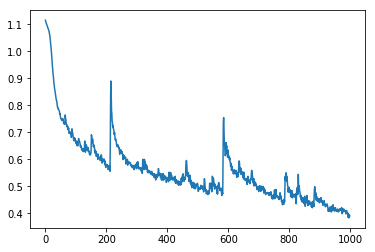

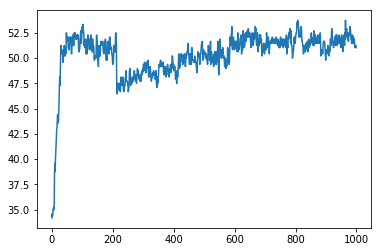

In [22]:
plt.plot(epoch_losses)
plt.show()
plt.plot(epoch_accuracies)
plt.show()

In [23]:
max(epoch_accuracies)

53.75

## Save model 

In [24]:
torch.save(model.state_dict(), "passive_force_model.pt")

## Load model and evaluate

In [25]:
model = ComplexRNNModel(input_dim, first_hidden_dim, second_hidden_dim, output_dim)
model.load_state_dict(torch.load("passive_force_model.pt"))
model.eval()
model = model.cuda()

In [26]:
accuracy, predicted = evaluate(model, val_loader, return_predicted=True)

In [27]:
print(accuracy)

51.041666666666664


In [28]:
predicted = [pred.cpu() for pred in predicted]
Y_val = np.concatenate([y.cpu().numpy() for x, y in val_loader])

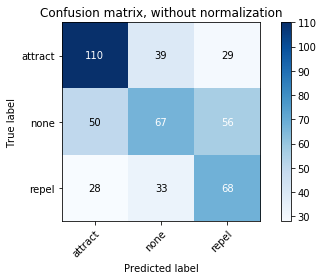

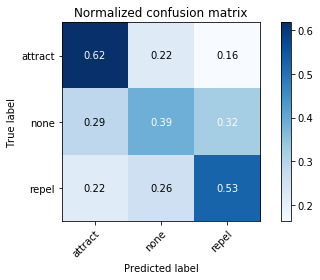

In [29]:
plot_confusion_matrix(Y_val, predicted, classes=FORCE_CLASS_COLS, normalize=False)
plot_confusion_matrix(Y_val, predicted, classes=FORCE_CLASS_COLS, normalize=True)